# **Installing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ucimlrepo

# **Hand Wirtten Digit Dataset**

## ===== Prepare Dataset =====

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
digits = fetch_ucirepo(id=80)

In [ ]:
X = digits.data.features
y = digits.data.targets

In [ ]:
X

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0              0           1           6          15          12           1   
1              0           0          10          16           6           0   
2              0           0           8          15          16          13   
3              0           0           0           3          11          16   
4              0           0           5          14           4           0   
...          ...         ...         ...         ...         ...         ...   
5615           0           0           4          10          13           6   
5616           0           0           6          16          13          11   
5617           0           0           1          11          15           1   
5618           0           0           2          10           7           0   
5619           0           0          10          14           8           1   

      Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute55  \
0              0           0           0            7  ...            0   
1              0           0           0            7  ...            3   
2              0           0           0            1  ...            0   
3              0           0           0            0  ...            0   
4              0           0           0            0  ...           12   
...          ...         ...         ...          ...  ...          ...   
5615           0           0           0            1  ...            4   
5616           1           0           0            0  ...            1   
5617           0           0           0            0  ...            0   
5618           0           0           0            0  ...            2   
5619           0           0           0            2  ...            8   

      Attribute56  Attribute57  Attribute58  Attribute59  Attribute60  \
0               0            0            0            6           14   
1               0            0            0           10           16   
2               0            0            0            9           14   
3               0            0            0            0            1   
4               0            0            0            4           12   
...           ...          ...          ...          ...          ...   
5615            0            0            0            2           14   
5616            0            0            0            6           16   
5617            0            0            0            2            9   
5618            0            0            0            5           12   
5619            0            0            1            8           12   

      Attribute61  Attribute62  Attribute63  Attribute64  
0               7            1            0            0  
1              15            3            0            0  
2               0            0            0            0  
3              15            2            0            0  
4              14            7            0            0  
...           ...          ...          ...          ...  
5615           15            9            0            0  
5616           14            6            0            0  
5617           13            6            0            0  
5618           16           12            0            0  
5619           14           12            1            0  

[5620 rows x 64 columns]

In [ ]:
y

class
0         0
1         0
2         7
3         4
4         6
...     ...
5615      9
5616      0
5617      8
5618      9
5619      8

[5620 rows x 1 columns]

## ===== Principal Component Analysis (PCA) =====

Explained variance ratio by each component: [1.16058580e-01 1.01701536e-01 7.80219607e-02 5.83857531e-02
 4.87287824e-02 4.44316461e-02 3.85877681e-02 3.39688103e-02
 2.84702728e-02 2.66407663e-02 2.57952555e-02 2.39640483e-02
 2.29641894e-02 2.09663662e-02 1.98540773e-02 1.92591302e-02
 1.83958755e-02 1.79110669e-02 1.61101921e-02 1.53670187e-02
 1.44033255e-02 1.35133284e-02 1.26344227e-02 1.13733091e-02
 1.02700335e-02 1.01363699e-02 9.84299671e-03 9.24277181e-03
 8.78744597e-03 8.23774719e-03 8.05148259e-03 7.30720466e-03
 7.12056062e-03 6.30496265e-03 6.16040321e-03 6.03570820e-03
 5.55208908e-03 5.13331216e-03 4.94934613e-03 4.52420547e-03
 4.38713196e-03 4.10618712e-03 3.93404572e-03 3.51002669e-03
 3.44296187e-03 3.27169186e-03 3.15703391e-03 2.87722127e-03
 2.65990842e-03 2.60422421e-03 2.50353416e-03 2.41975789e-03
 2.21433164e-03 2.06632155e-03 1.89531541e-03 1.84897966e-03
 1.67357847e-03 1.57841578e-03 1.43360959e-03 1.26219371e-03
 1.04637788e-03 9.43029486e-04 1.47912361

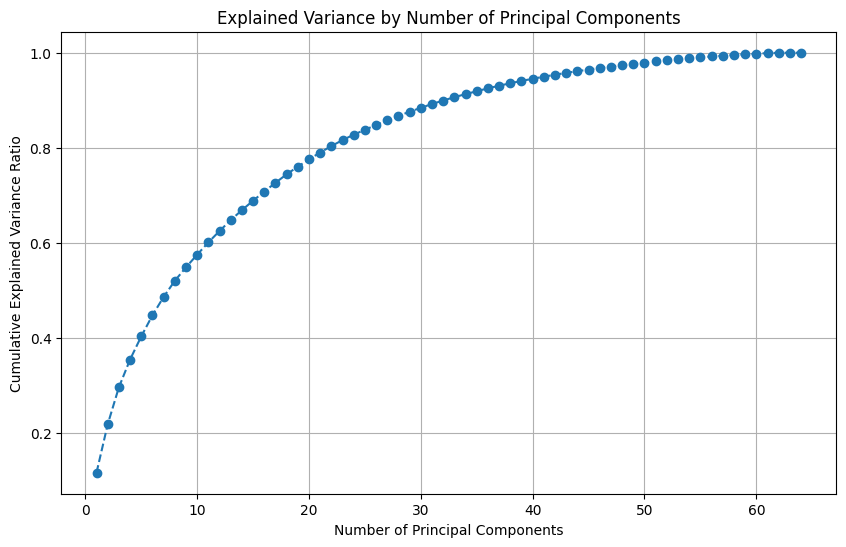

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by each component:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

Based on the cumulative explained variance plot, you can decide how many principal components to retain to capture a desired amount of variance. For example, to retain 95% of the variance, you would choose the number of components where the cumulative explained variance is close to 0.95.

Let's apply PCA with a chosen number of components (e.g., based on the plot).

In [ ]:
# Choose the number of components (e.g., to retain 95% variance)
# Based on the plot, let's assume we choose 10 components to retain most of the variance
n_components = 50 # You can change this based on your analysis of the plot

pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca_reduced.shape[1]}")
print("\nData after PCA:")
display(pd.DataFrame(X_pca_reduced).head())


Original number of features: 64
Reduced number of features after PCA: 50

Data after PCA:


0         1         2         3         4         5         6   \
0 -0.296633 -1.446450 -3.863044 -3.223597  0.773631  0.631849  0.163733   
1 -0.156717 -3.065688 -5.811656 -3.232099  1.064670  0.031353  0.270302   
2 -0.753929  3.261949  0.779656 -1.108976  0.311024 -0.814548 -4.307315   
3 -4.226579  1.900320 -0.441486  1.329548 -0.149220  2.710149  2.128209   
4  0.582983 -3.490539 -1.602212 -1.052587 -1.360737  0.406474 -0.662578   

         7         8         9   ...        40        41        42        43  \
0  0.474708 -1.085103 -0.027994  ...  0.517559  0.494320  0.042024 -0.919845   
1  2.091832 -1.487364 -0.998295  ...  0.754699 -0.204192 -0.292517 -0.300754   
2  0.841364 -1.166513 -0.126725  ... -0.572788 -0.060109  0.004906  0.315338   
3  0.206327 -1.659819  0.573584  ...  0.943616 -0.845965 -0.179062  0.466753   
4 -2.572619  0.341349  0.066232  ...  0.094542  0.086006  0.098118  0.760049   

         44        45        46        47        48        49  
0 -0.181330 -0.604761  0.116663 -0.247460  0.112606 -0.090206  
1 -0.441550 -0.082849  0.587194  0.018828  0.014534  0.211886  
2  0.331871  0.927054 -0.313190 -0.748029 -0.148217 -0.039561  
3  0.564706  0.060870  0.027984  0.323670 -0.110900 -1.064628  
4 -0.532223  0.368102  0.162075  0.593148 -0.220887 -0.314977  

[5 rows x 50 columns]

## ===== SVM =====

### Different SVM models

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


training_sizes = [0.5, 0.6, 0.7, 0.8]
kernels = {
    'linear': 'linear',
    'polynomial': 'poly',
    'gaussian': 'rbf',
    'sigmoid': 'sigmoid'
}

### Calculate values for different test size

In [ ]:
results = []
confusion_matrices = []
trained_models = [] # Add a list to store trained models

for kernel_name, kernel in kernels.items():
  for size in training_sizes:
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
   svc = SVC(kernel=kernel, probability=True, random_state=42) # Add probability=True
   svc.fit(X_train, y_train.values.ravel())
   y_pred = svc.predict(X_test)

   acc = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) # Calculate weighted precision, handle zero division
   recall = recall_score(y_test, y_pred, average='weighted') # Calculate weighted recall
   f1 = f1_score(y_test, y_pred, average='weighted') # Calculate weighted F1-score


   cm = confusion_matrix(y_test, y_pred) # Calculate confusion matrix

   results.append({
       "Training size":int (size*100),
       "Accuracy":acc,
       "Precision": precision,
       "Recall": recall,
       "F1-score": f1,
       "Kernel":kernel_name
   })
   confusion_matrices.append({ # Store confusion matrix with metadata
       "Training size":int (size*100),
       "Kernel":kernel_name,
       "Confusion Matrix":cm
   })
   trained_models.append({ # Store the trained model with metadata
       "Training size":int (size*100),
       "Kernel":kernel_name,
       "Model": svc,
       "X_test": X_test,
       "y_test": y_test
   })

### Print Evalution Table and Graphs

Training size  Accuracy  Precision    Recall  F1-score      Kernel
0              50  0.972954   0.973049  0.972954  0.972962      linear
1              60  0.974792   0.974869  0.974792  0.974799      linear
2              70  0.971530   0.971745  0.971530  0.971538      linear
3              80  0.968194   0.968383  0.968194  0.968173      linear
4              50  0.985053   0.985087  0.985053  0.985055  polynomial
5              60  0.986655   0.986672  0.986655  0.986647  polynomial
6              70  0.985765   0.985794  0.985765  0.985765  polynomial
7              80  0.979760   0.979809  0.979760  0.979765  polynomial
8              50  0.986121   0.986187  0.986121  0.986130    gaussian
9              60  0.983096   0.983148  0.983096  0.983091    gaussian
10             70  0.982461   0.982488  0.982461  0.982443    gaussian
11             80  0.974867   0.975072  0.974867  0.974875    gaussian
12             50  0.841993   0.848099  0.841993  0.843197     sigmoid
13             60  0.854686   0.859502  0.854686  0.855680     sigmoid
14             70  0.872140   0.875307  0.872140  0.873104     sigmoid
15             80  0.886566   0.888754  0.886566  0.887225     sigmoid

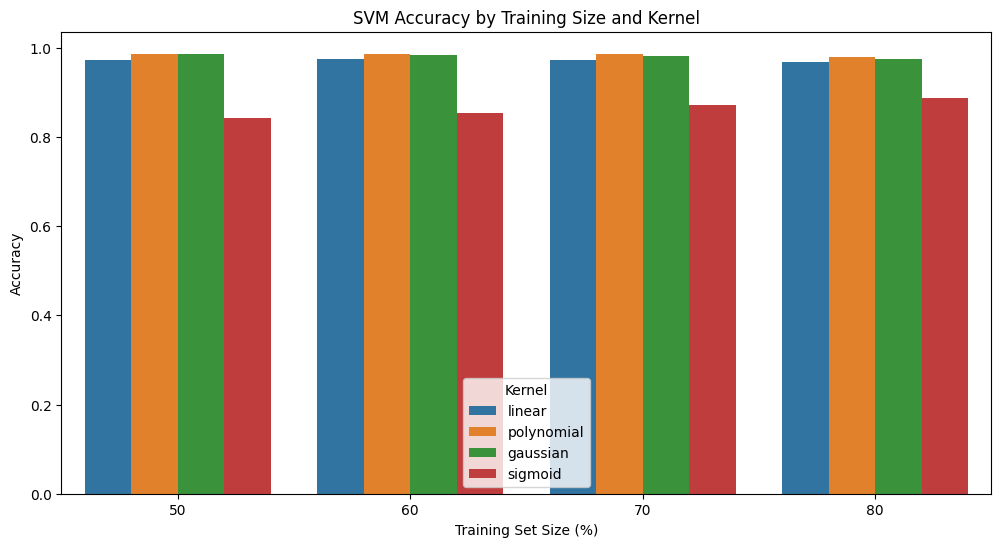

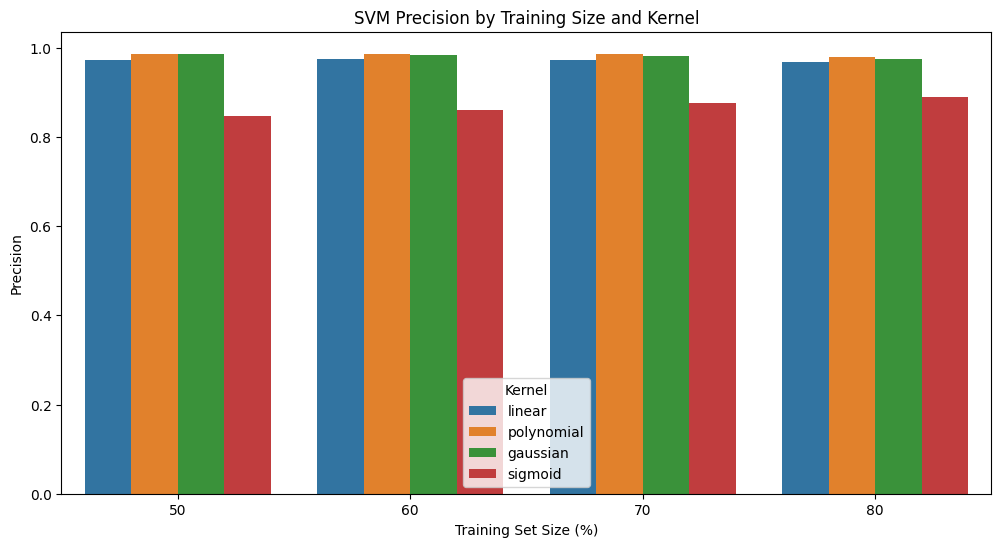

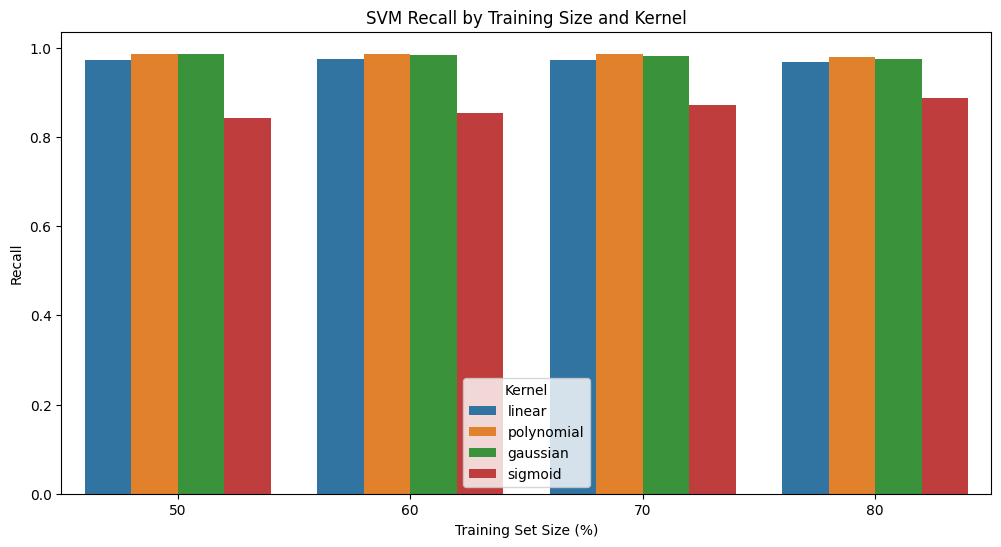

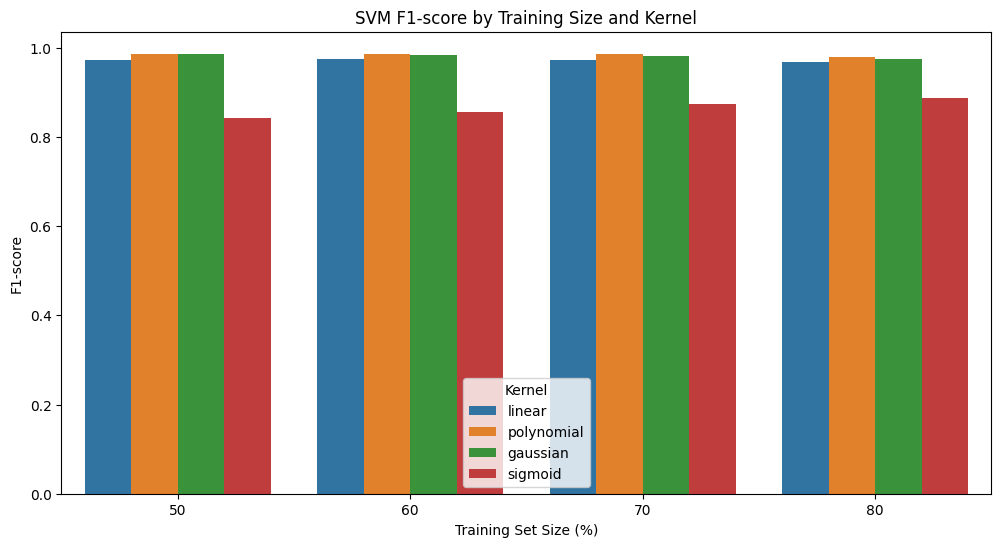

In [ ]:
df = pd.DataFrame(results)
display(df) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Accuracy', hue='Kernel')
plt.title('SVM Accuracy by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Precision', hue='Kernel')
plt.title('SVM Precision by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Recall', hue='Kernel')
plt.title('SVM Recall by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df, x='Training size', y='F1-score', hue='Kernel')
plt.title('SVM F1-score by Training Size and Kernel') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices

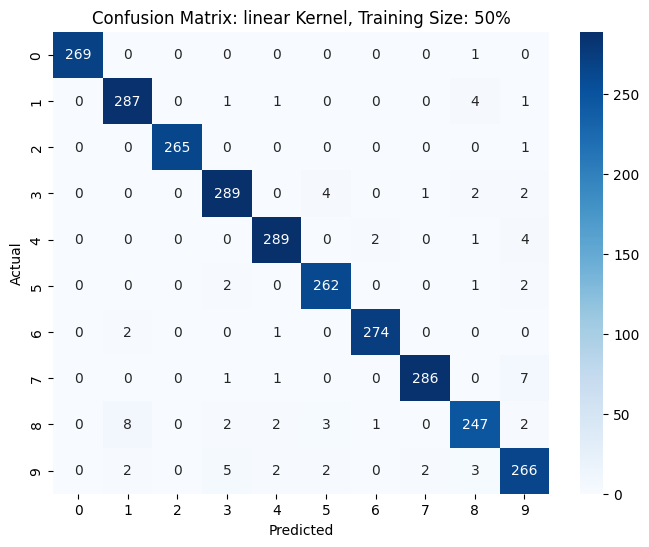

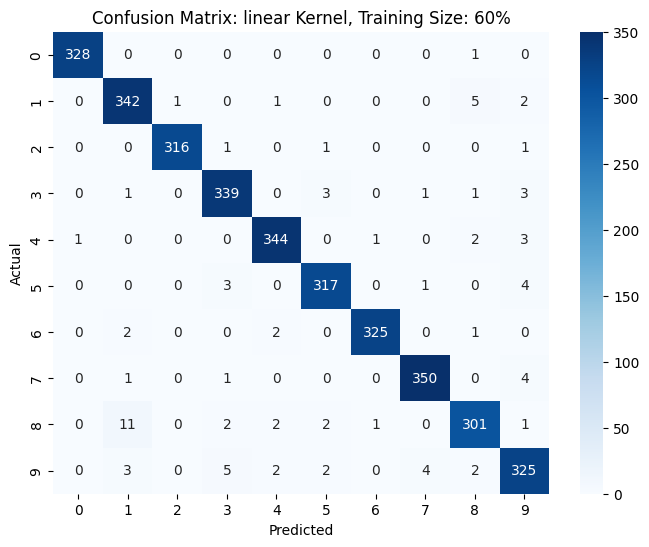

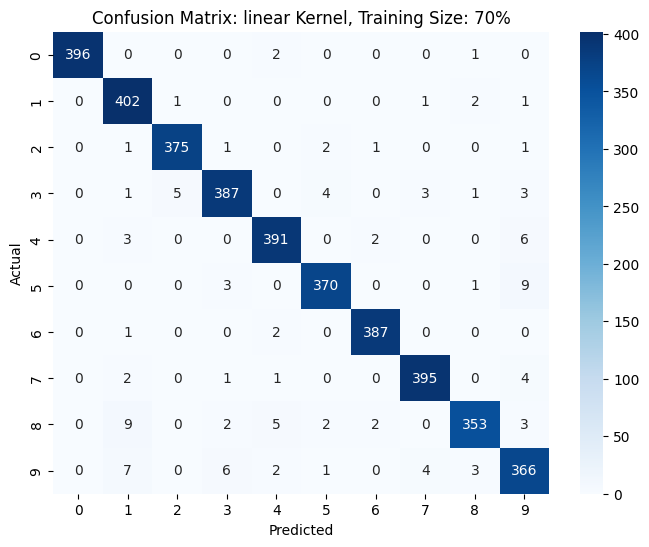

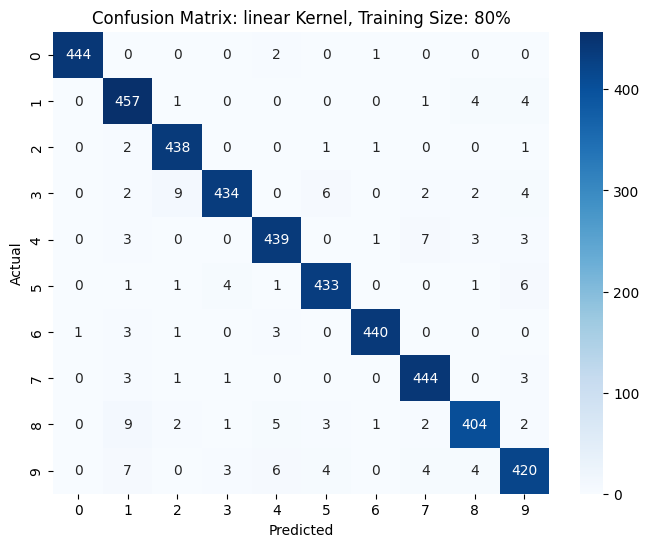

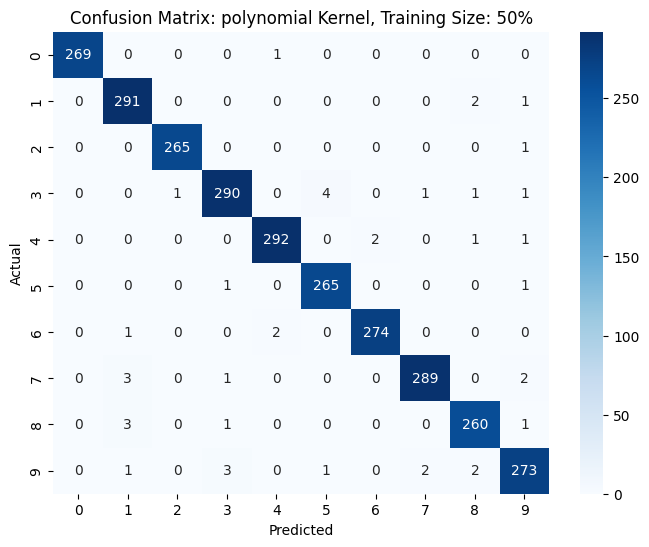

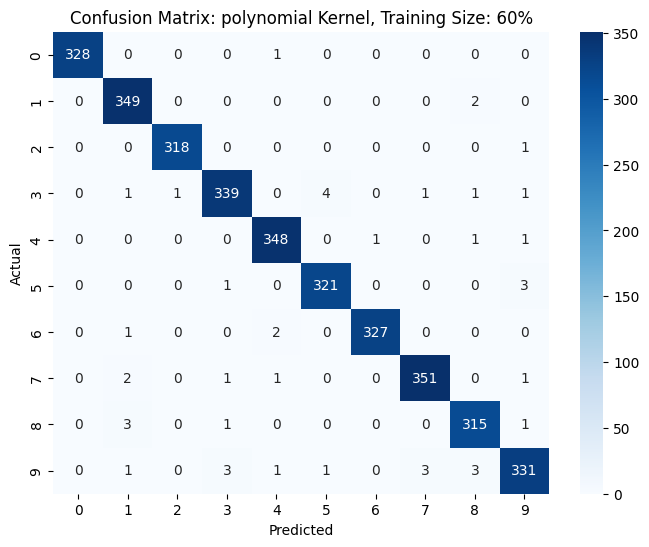

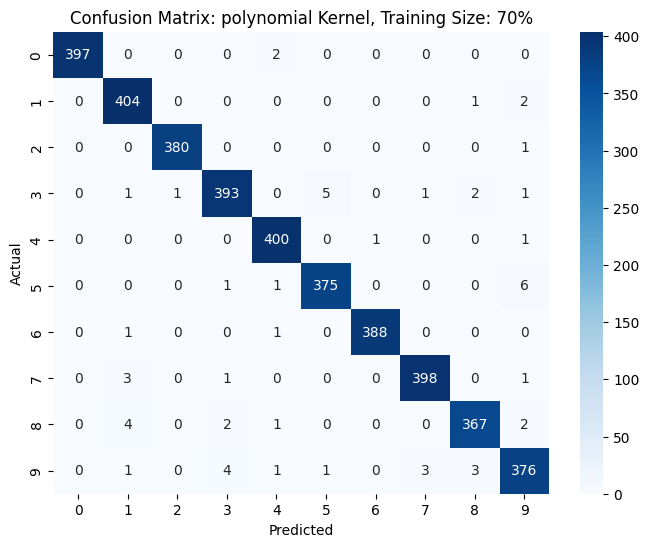

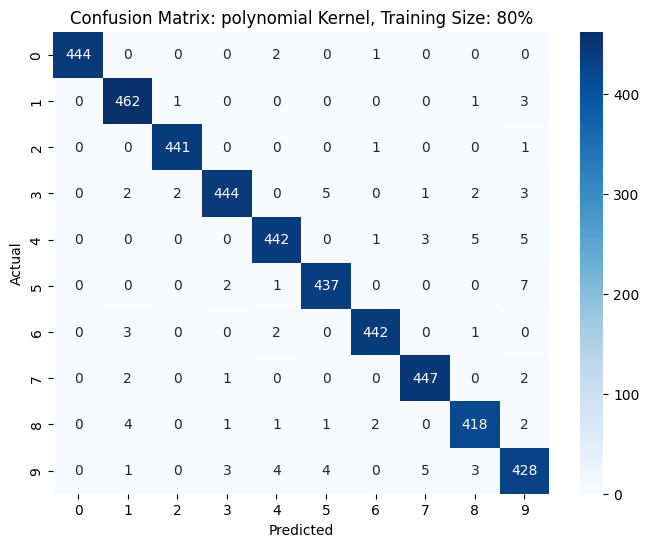

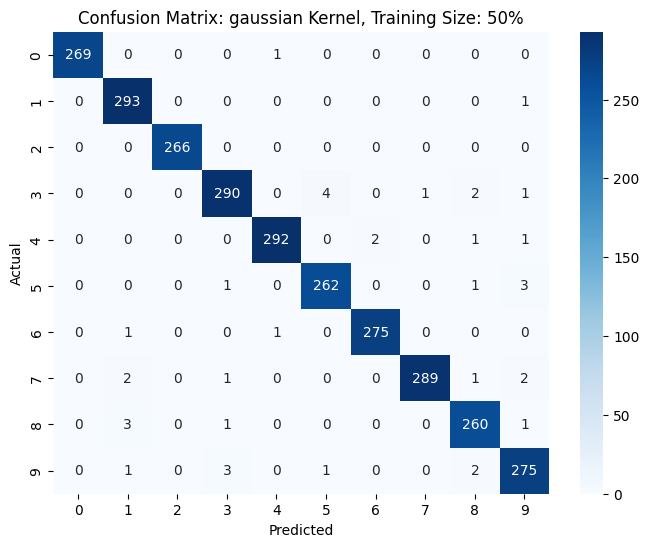

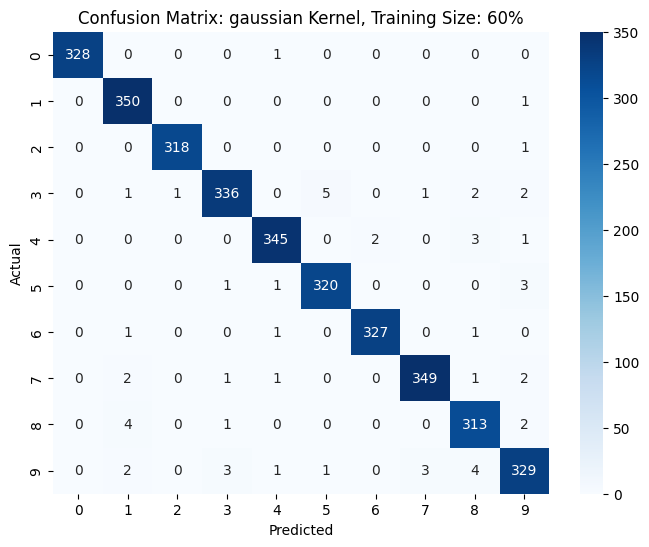

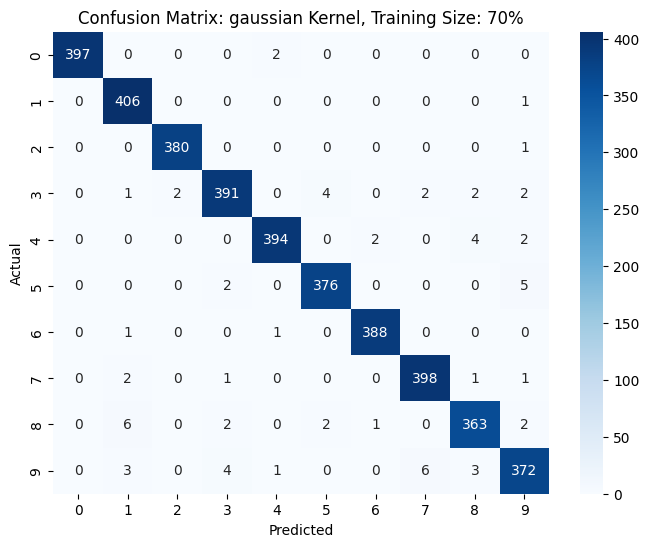

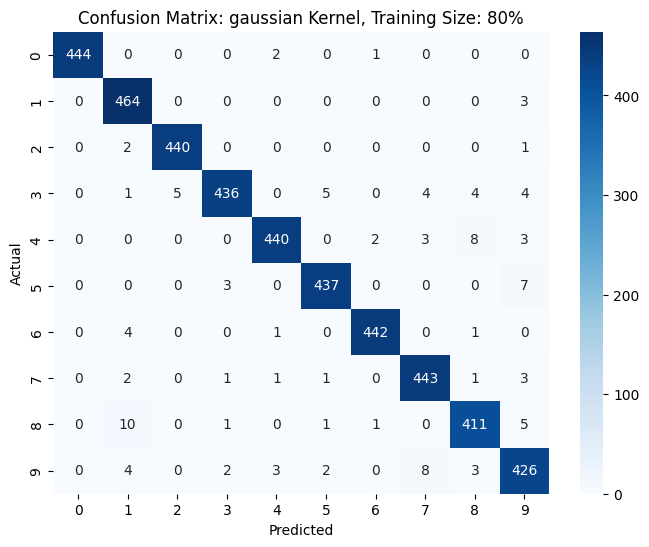

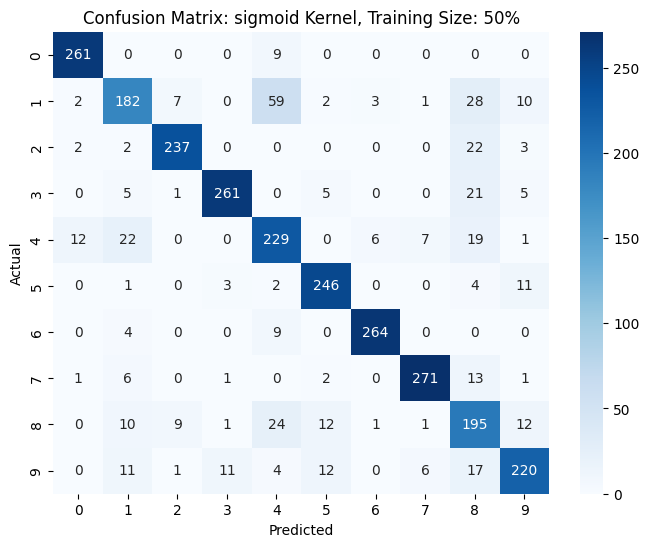

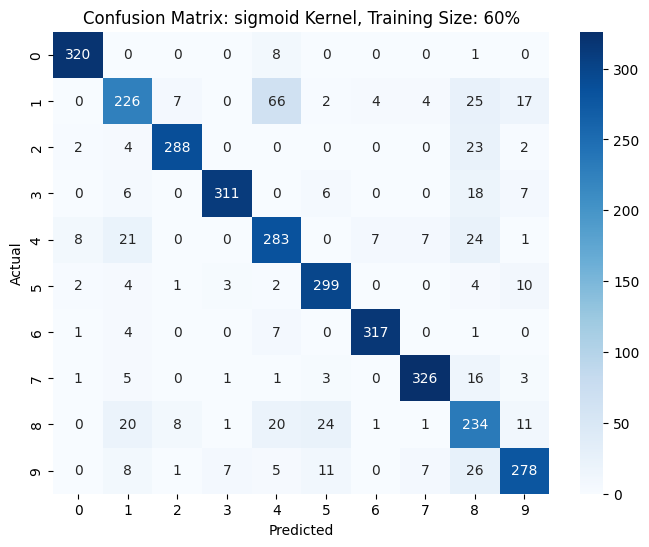

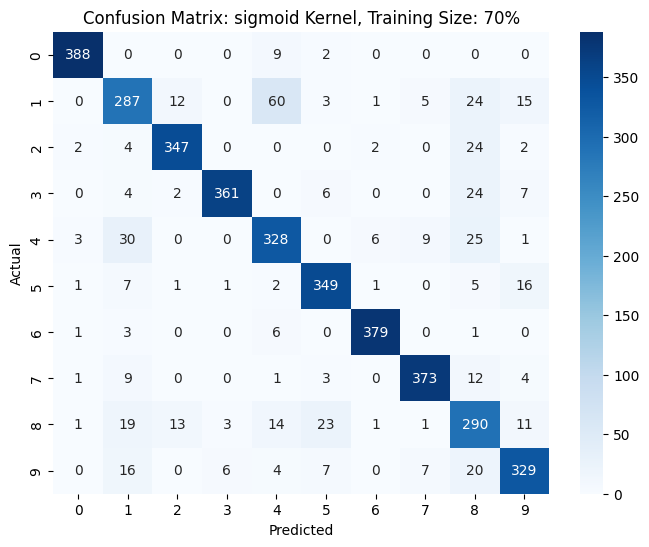

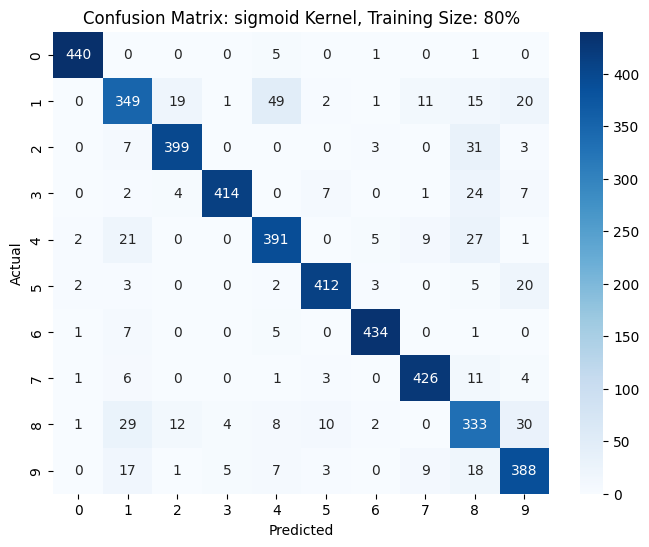

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices:
    cm = cm_data["Confusion Matrix"]
    kernel_name = cm_data["Kernel"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {kernel_name} Kernel, Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### ROC and AOC curve

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


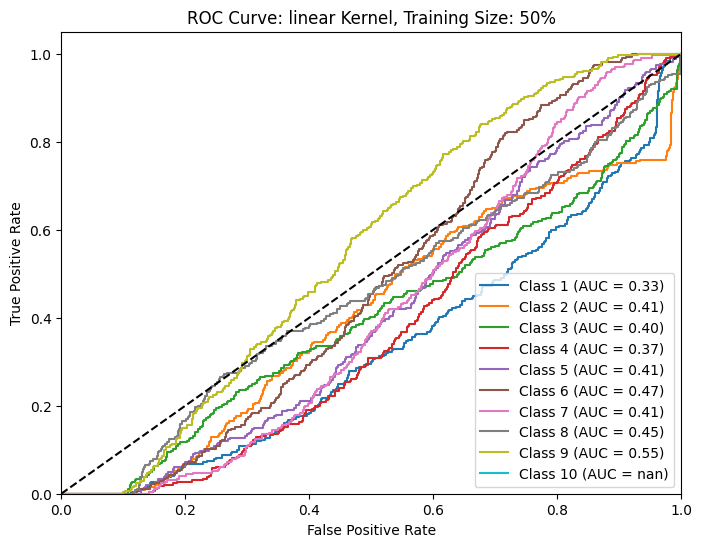

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


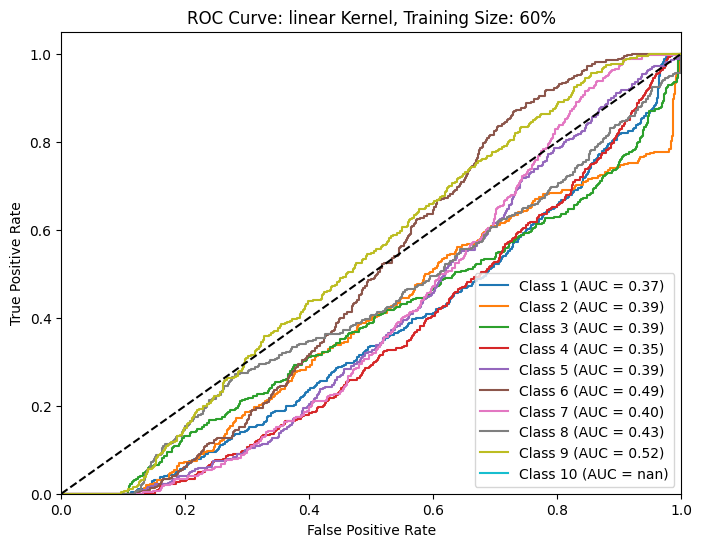

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


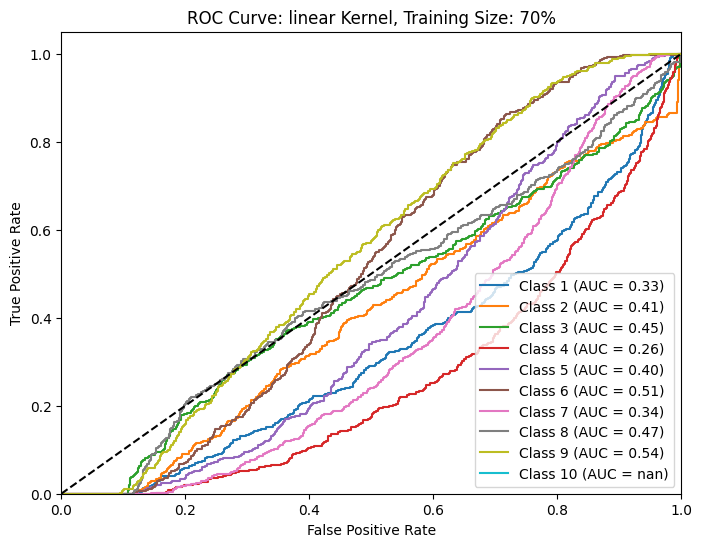

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


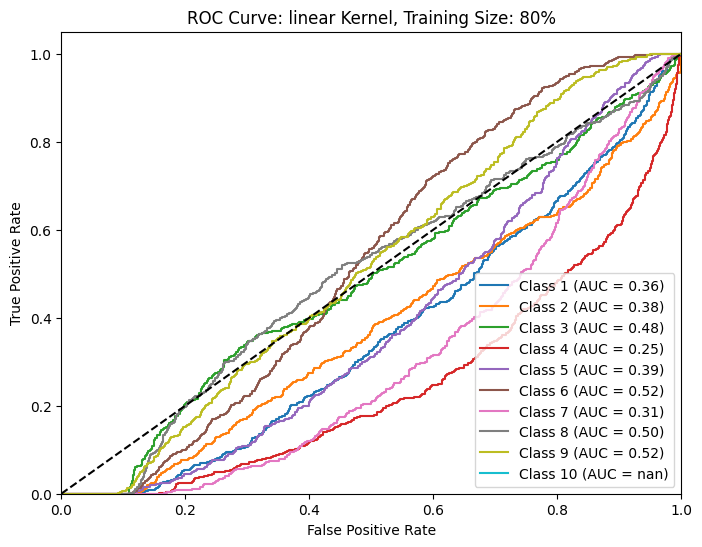

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


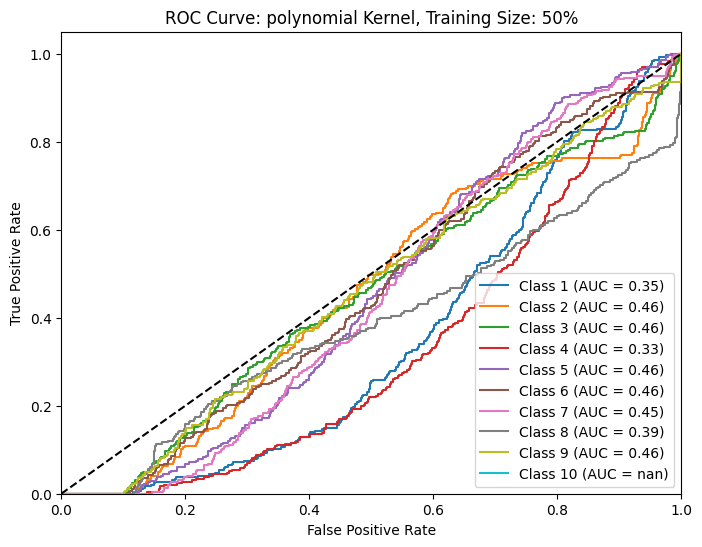

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


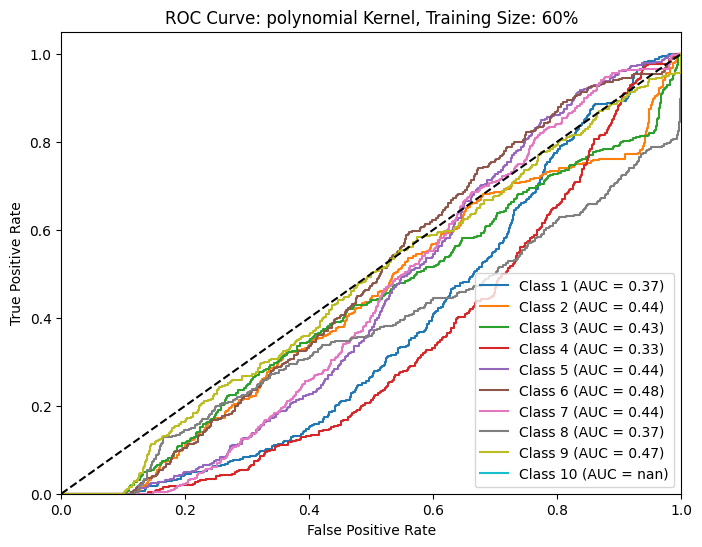

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


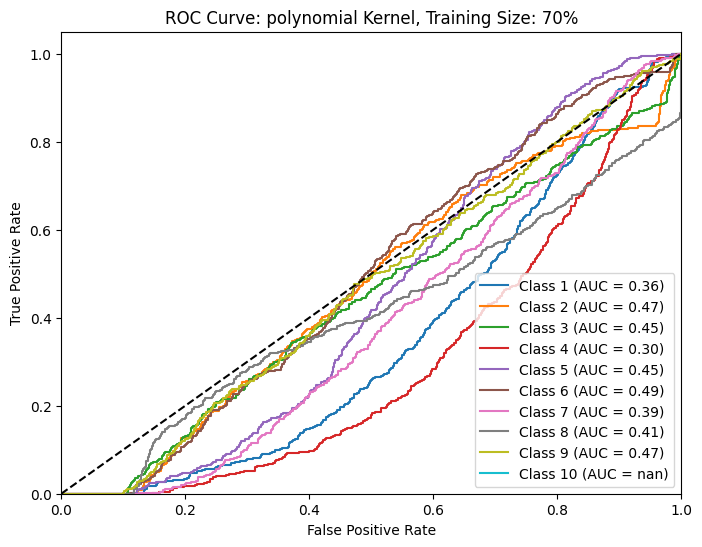

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


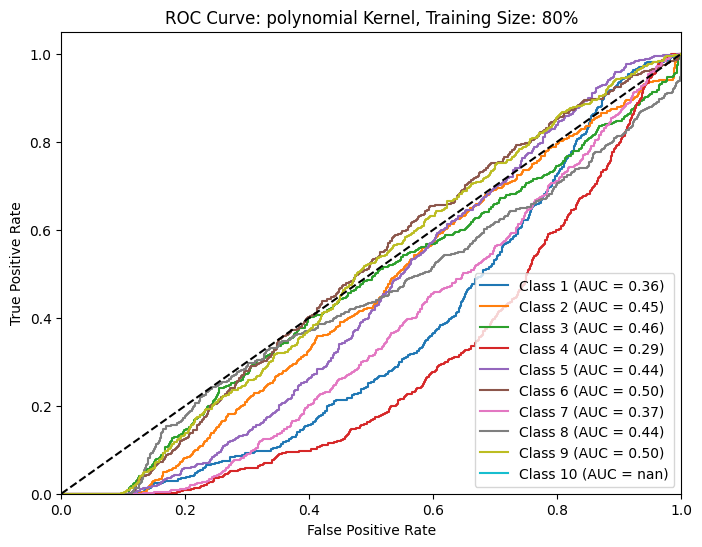

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


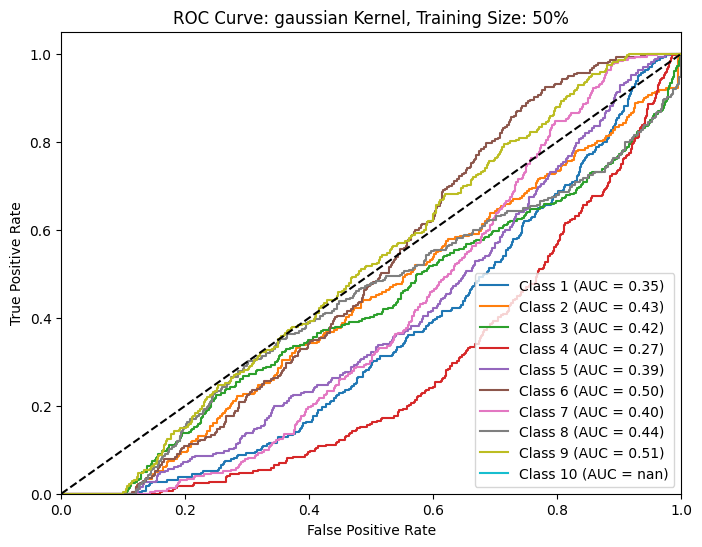

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


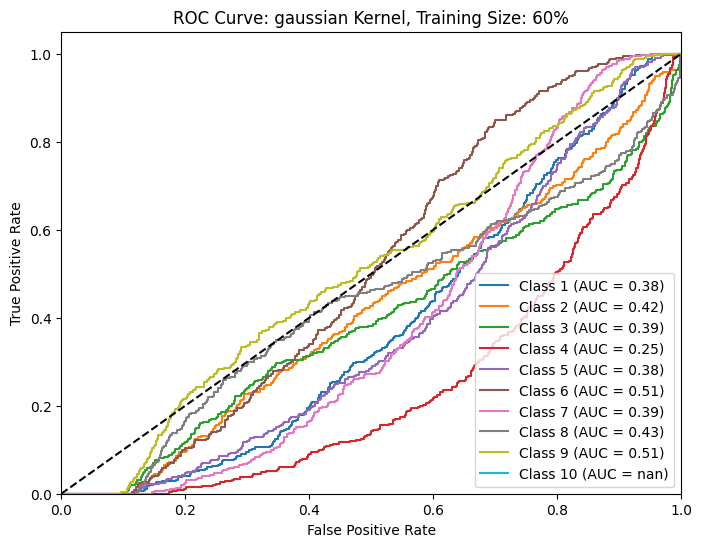

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


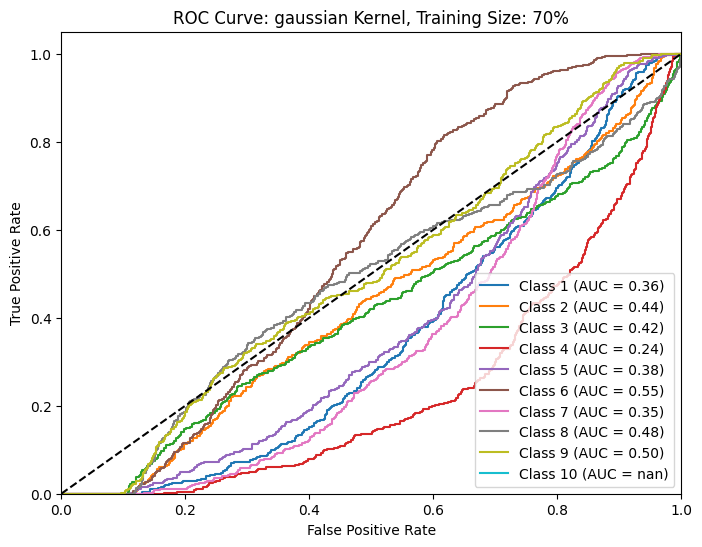

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


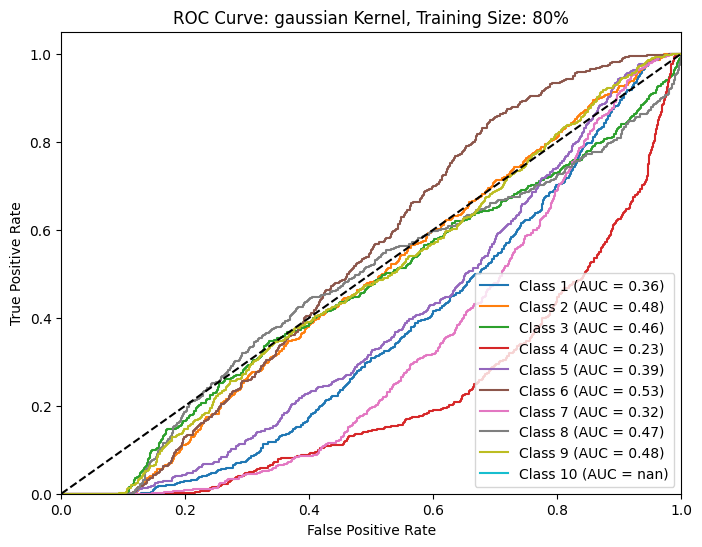

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


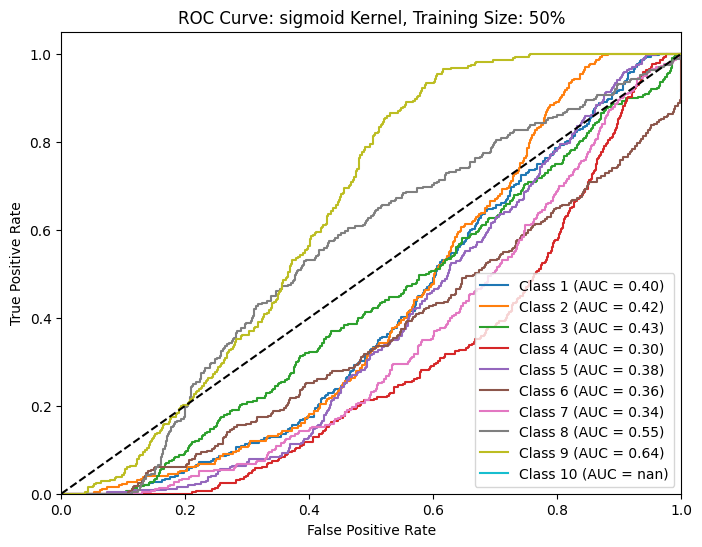

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


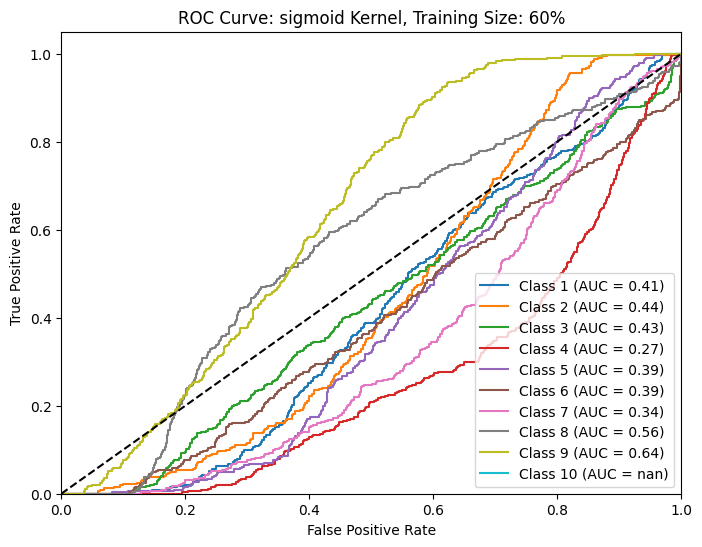

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


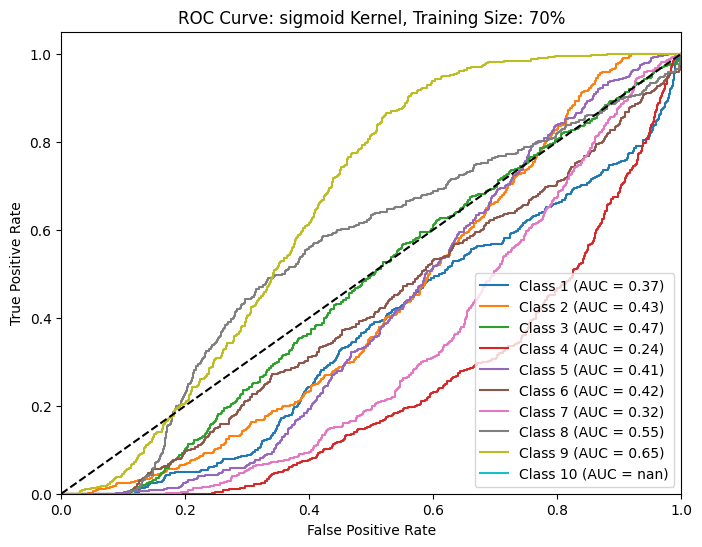

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


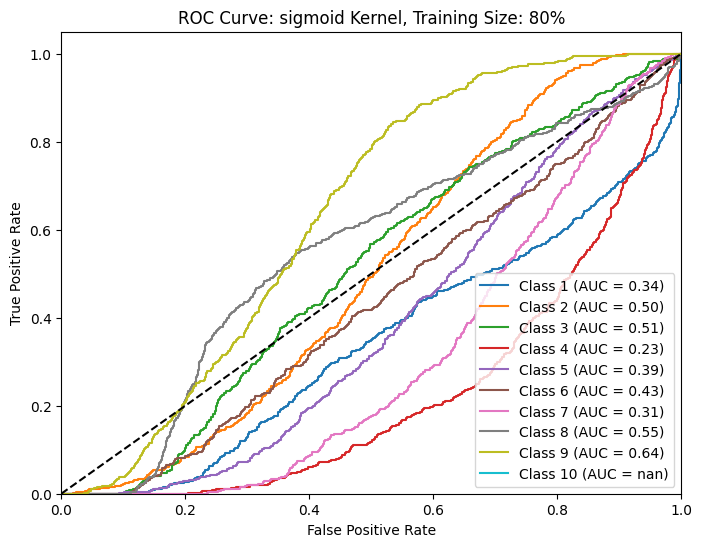

In [ ]:
from sklearn.metrics import roc_curve, auc

# Since this is a multi-class problem, we'll use a One-vs-Rest (OvR) approach for ROC curves
for model_data in trained_models:
    model = model_data["Model"]
    X_test = model_data["X_test"]
    y_test = model_data["y_test"]
    kernel_name = model_data["Kernel"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(8, 6)) # Create a new figure for each plot

    # Get predicted probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class using OvR
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_test))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--') # Plot random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {kernel_name} Kernel, Training Size: {training_size}%') # Add title for each plot
    plt.legend(loc="lower right")
    plt.show()

### Calculate values for different test size using PCA-reduced data

In [ ]:
results_pca = []
confusion_matrices_pca = []

for kernel_name, kernel in kernels.items():
  for size in training_sizes:
   X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=size, random_state=42)
   svc_pca = SVC(kernel=kernel, probability=True, random_state=42) # Add probability=True
   svc_pca.fit(X_train_pca, y_train.values.ravel())
   y_pred_pca = svc_pca.predict(X_test_pca)

   acc_pca = accuracy_score(y_test, y_pred_pca)
   precision_pca = precision_score(y_test, y_pred_pca, average='weighted', zero_division=0) # Calculate weighted precision, handle zero division
   recall_pca = recall_score(y_test, y_pred_pca, average='weighted') # Calculate weighted recall
   f1_pca = f1_score(y_test, y_pred_pca, average='weighted') # Calculate weighted F1-score


   cm_pca = confusion_matrix(y_test, y_pred_pca) # Calculate confusion matrix

   results_pca.append({
       "Training size":int (size*100),
       "Accuracy":acc_pca,
       "Precision": precision_pca,
       "Recall": recall_pca,
       "F1-score": f1_pca,
       "Kernel":kernel_name
   })
   confusion_matrices_pca.append({ # Store confusion matrix with metadata
       "Training size":int (size*100),
       "Kernel":kernel_name,
       "Confusion Matrix":cm_pca
   })

### Print Accuracy, Precision, Recall, and F1-score Table and Graphs for PCA-Reduced Data

Training size  Accuracy  Precision    Recall  F1-score      Kernel
0              50  0.970819   0.970937  0.970819  0.970850      linear
1              60  0.972716   0.972695  0.972716  0.972687      linear
2              70  0.968734   0.968882  0.968734  0.968751      linear
3              80  0.966192   0.966314  0.966192  0.966197      linear
4              50  0.964413   0.968400  0.964413  0.965236  polynomial
5              60  0.962930   0.967787  0.962930  0.963943  polynomial
6              70  0.956279   0.963473  0.956279  0.957801  polynomial
7              80  0.927491   0.948847  0.927491  0.932636  polynomial
8              50  0.980427   0.980517  0.980427  0.980437    gaussian
9              60  0.977165   0.977299  0.977165  0.977172    gaussian
10             70  0.975089   0.975237  0.975089  0.975076    gaussian
11             80  0.968416   0.968740  0.968416  0.968425    gaussian
12             50  0.927402   0.927971  0.927402  0.927522     sigmoid
13             60  0.933571   0.933986  0.933571  0.933645     sigmoid
14             70  0.933910   0.934523  0.933910  0.934033     sigmoid
15             80  0.940169   0.940999  0.940169  0.940326     sigmoid

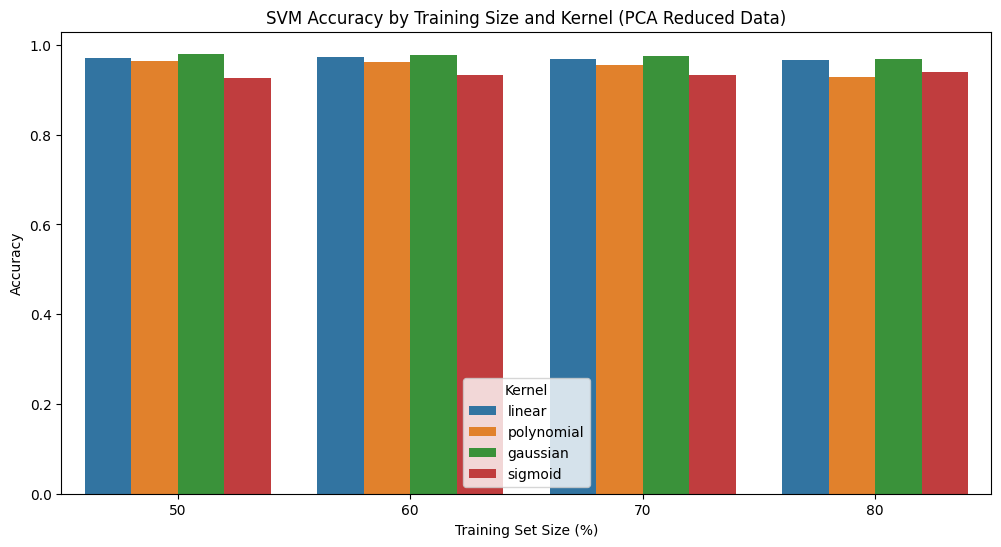

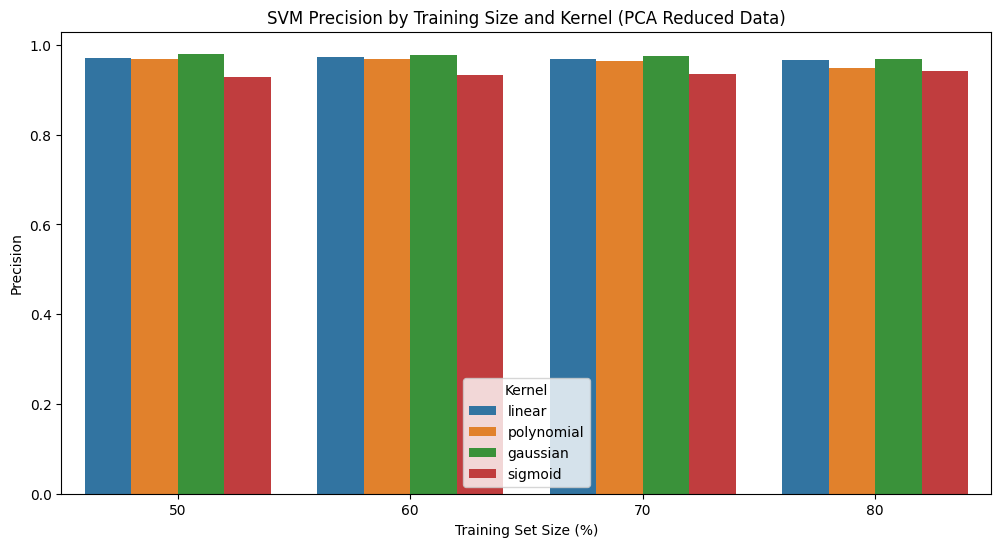

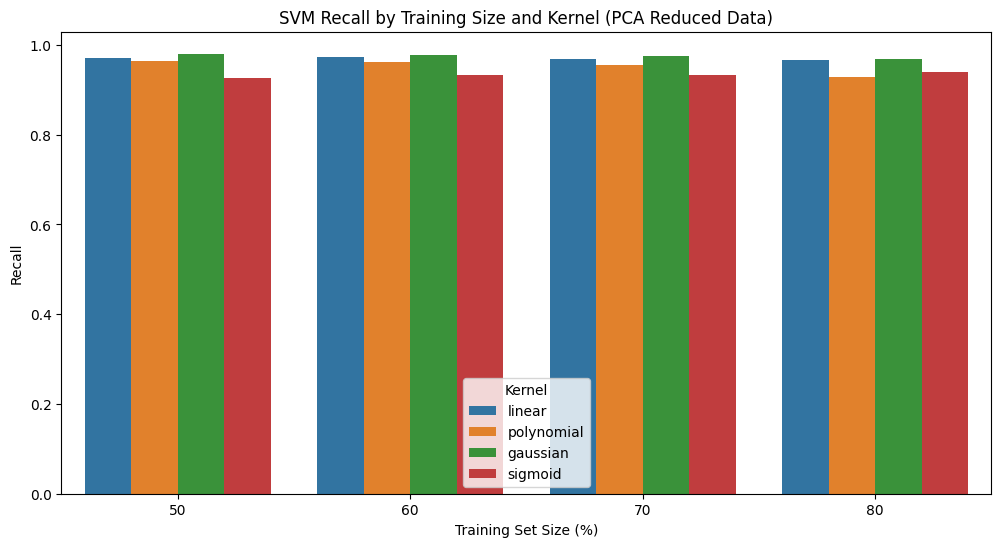

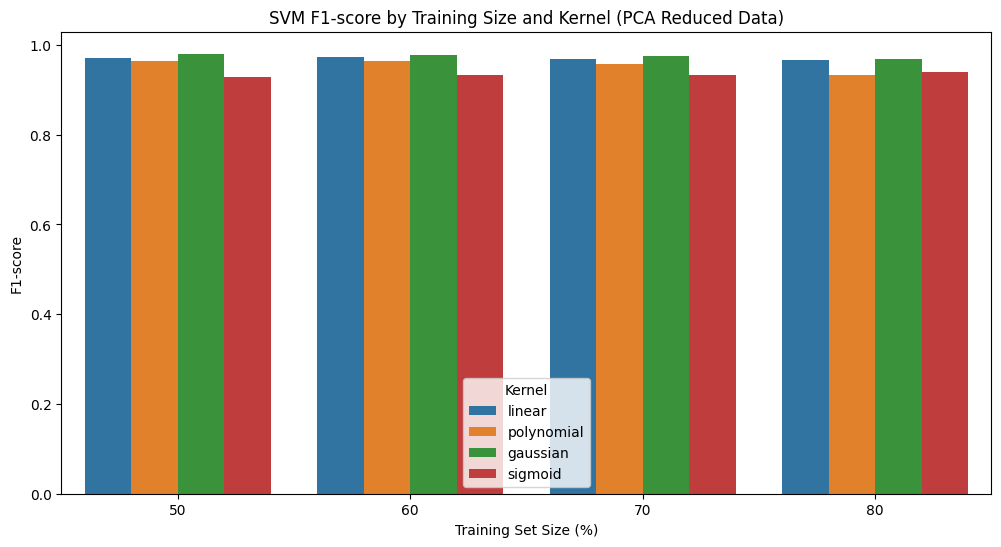

In [ ]:
df_pca = pd.DataFrame(results_pca)
display(df_pca) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='Accuracy', hue='Kernel')
plt.title('SVM Accuracy by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='Precision', hue='Kernel')
plt.title('SVM Precision by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='Recall', hue='Kernel')
plt.title('SVM Recall by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(12, 6)) # Increase figure size
sns.barplot(data=df_pca, x='Training size', y='F1-score', hue='Kernel')
plt.title('SVM F1-score by Training Size and Kernel (PCA Reduced Data)') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices for PCA-Reduced Data

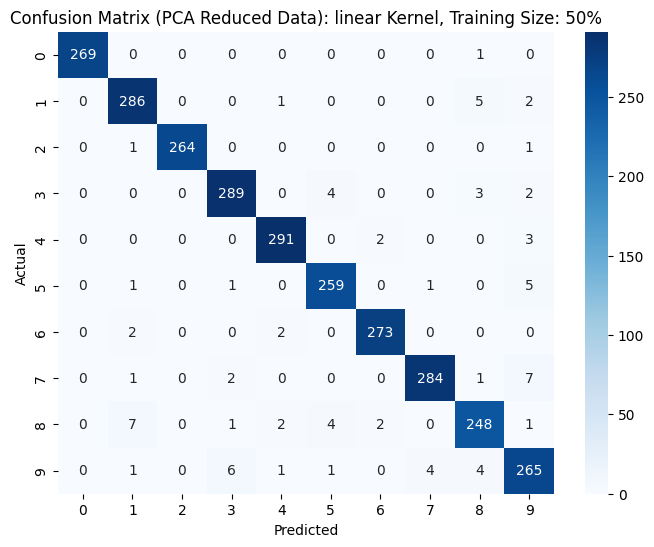

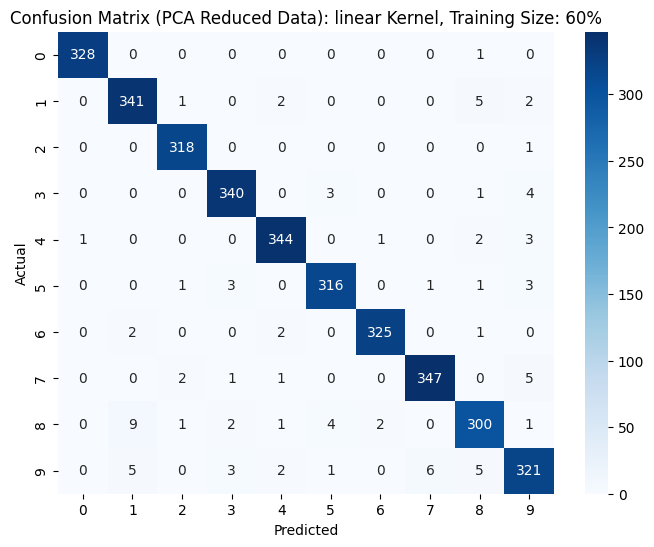

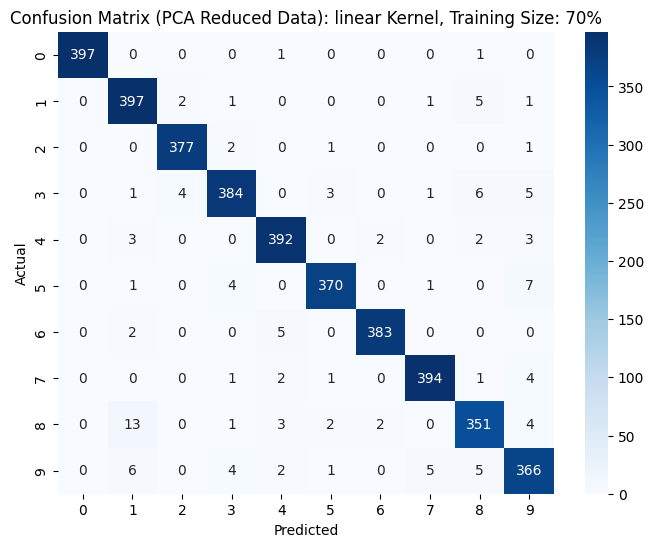

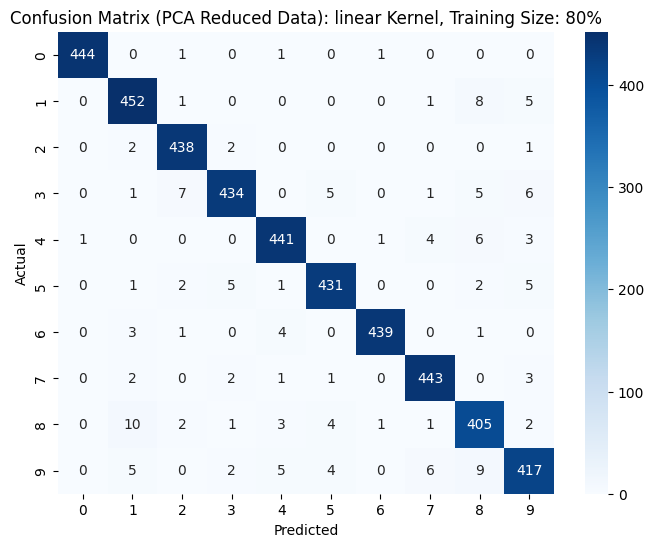

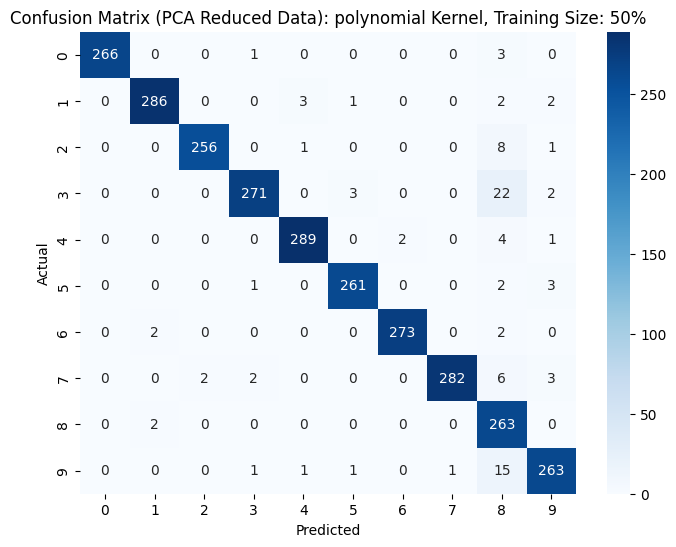

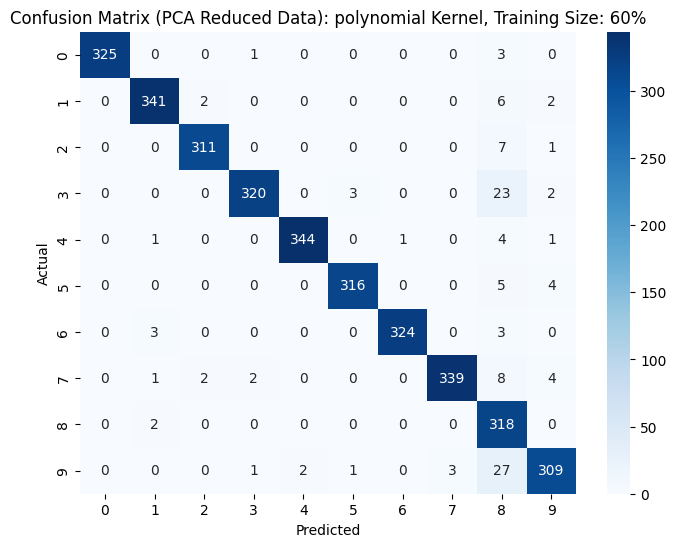

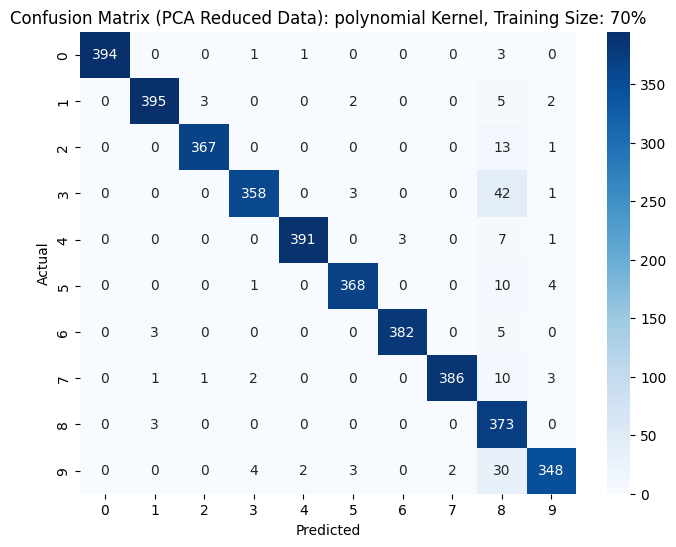

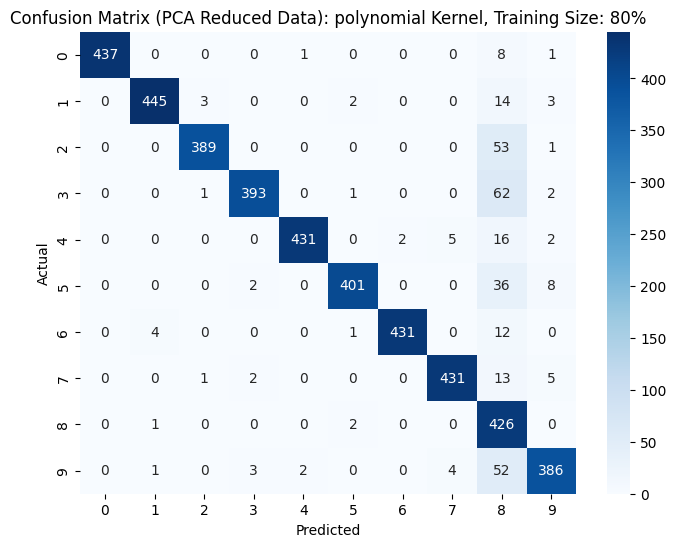

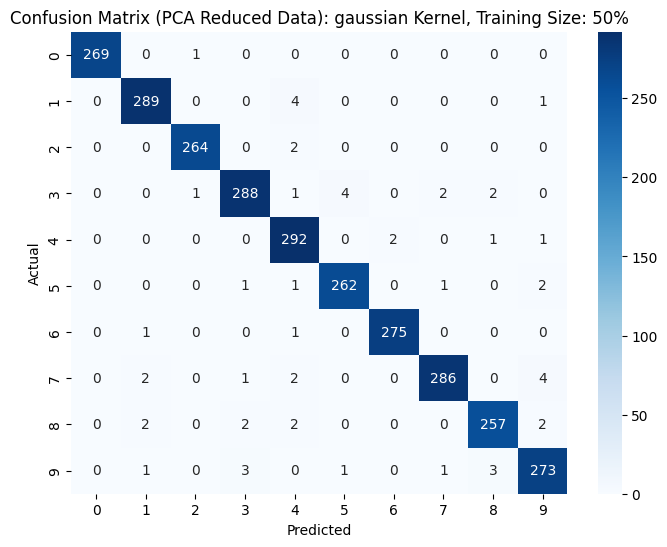

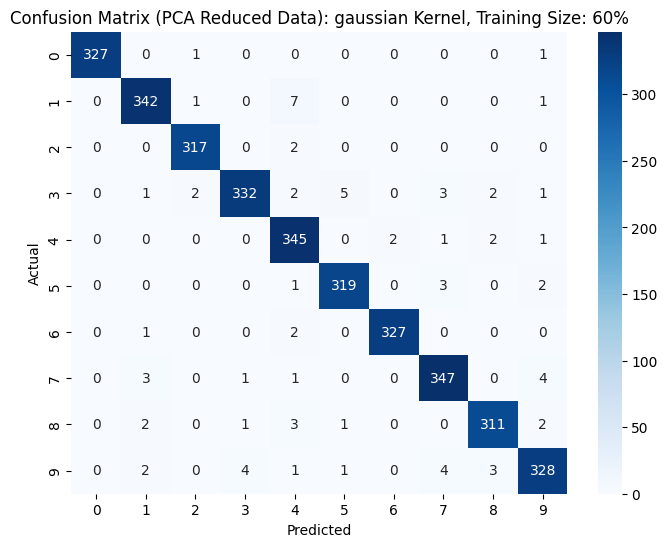

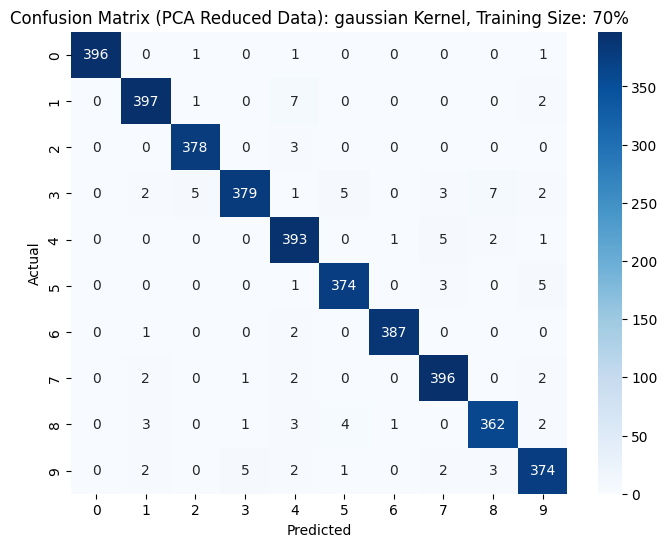

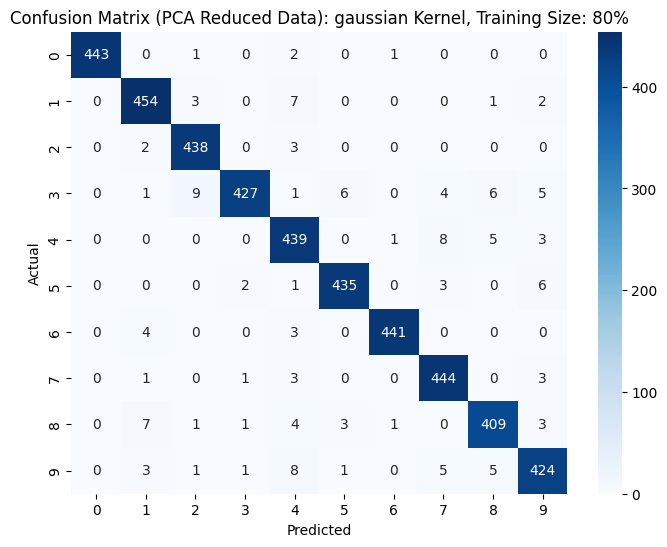

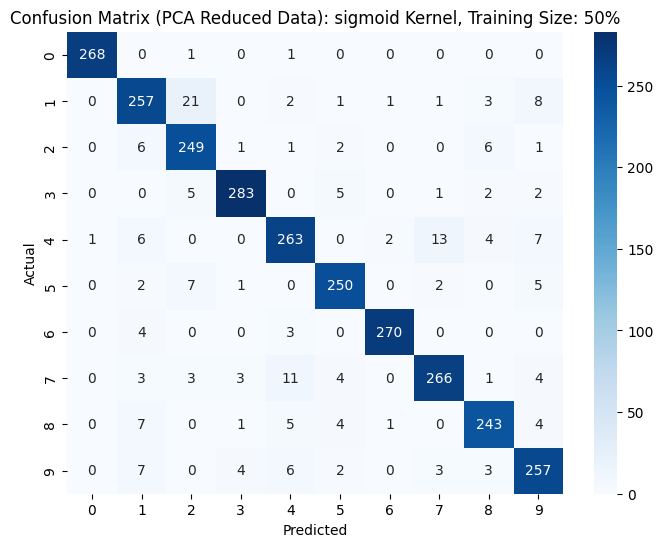

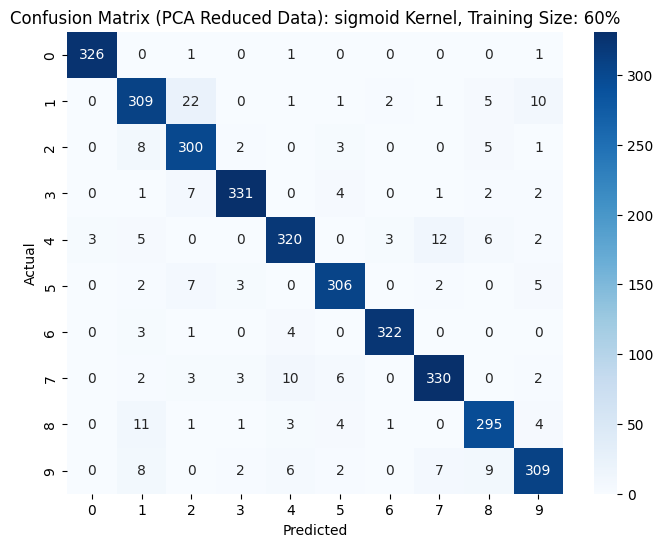

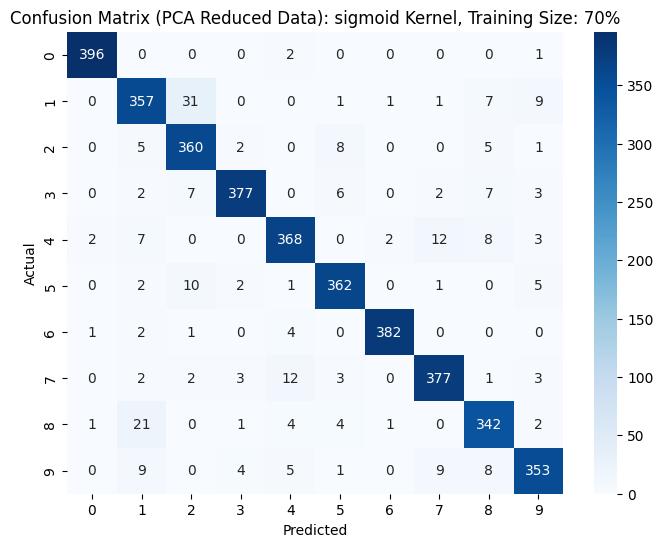

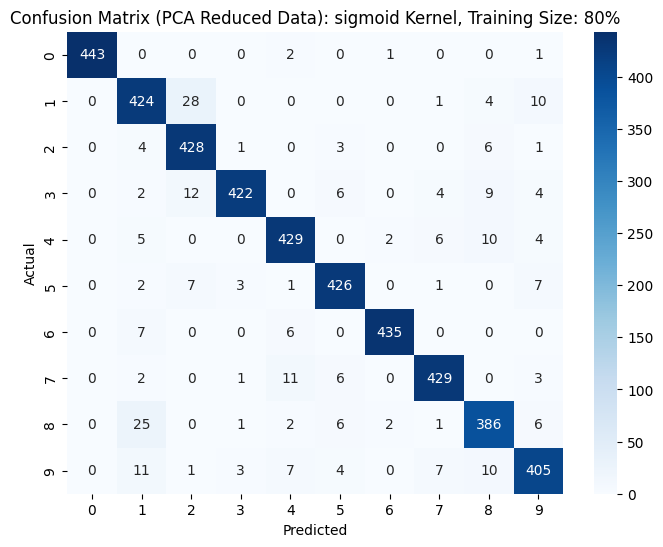

In [ ]:
for cm_data in confusion_matrices_pca:
    cm = cm_data["Confusion Matrix"]
    kernel_name = cm_data["Kernel"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (PCA Reduced Data): {kernel_name} Kernel, Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## ===== MLP =====

### Calculate values for different test size

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

training_sizes = [0.5, 0.6, 0.7, 0.8]

results_mlp = []
confusion_matrices_mlp = []
trained_models_mlp = []

for size in training_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    # Initialize MLPClassifier
    # You might need to tune the hyperparameters like hidden_layer_sizes, activation, solver, etc.
    mlp = MLPClassifier(max_iter=1000)

    mlp.fit(X_train, y_train.values.ravel())
    y_pred = mlp.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)

    results_mlp.append({
        "Training size": int(size * 100),
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })
    confusion_matrices_mlp.append({
        "Training size": int(size * 100),
        "Confusion Matrix": cm
    })
    trained_models_mlp.append({ # Store the trained model with metadata
      "Training size":int (size*100),
      "Model": mlp,
      "X_test": X_test,
      "y_test": y_test
    })

### Print Evalution Table and Graphs

Training size  Accuracy  Precision    Recall  F1-score
0             50  0.978648   0.978861  0.978648  0.978668
1             60  0.968861   0.969049  0.968861  0.968876
2             70  0.966955   0.967166  0.966955  0.966987
3             80  0.964635   0.965304  0.964635  0.964730

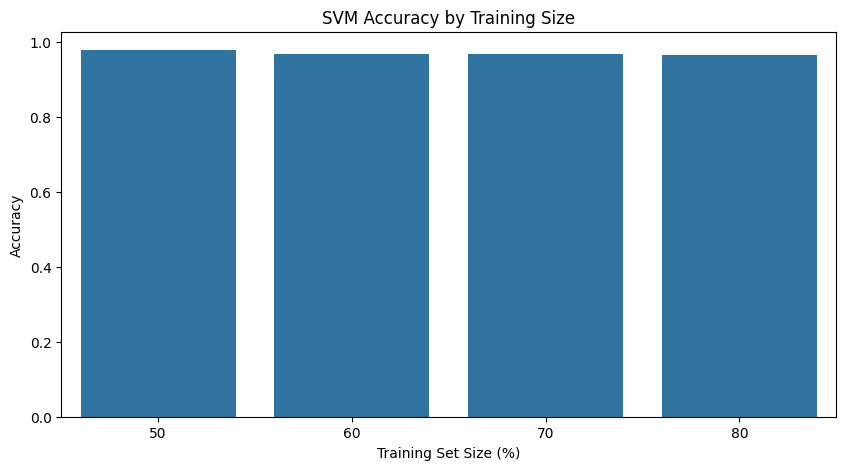

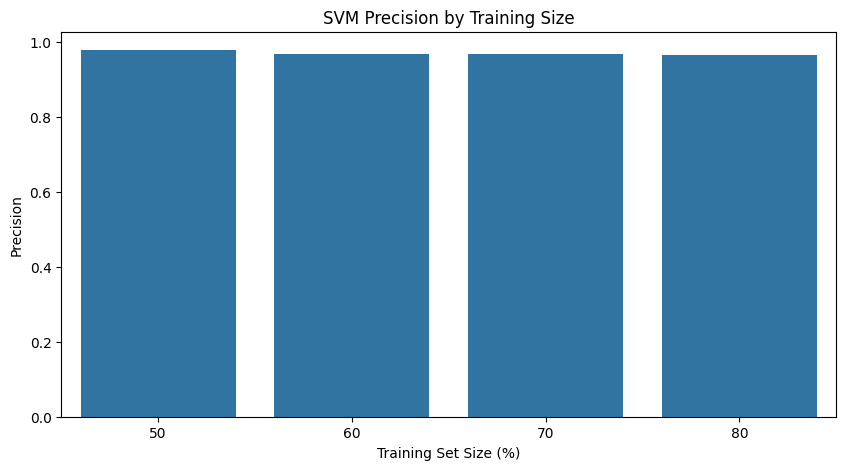

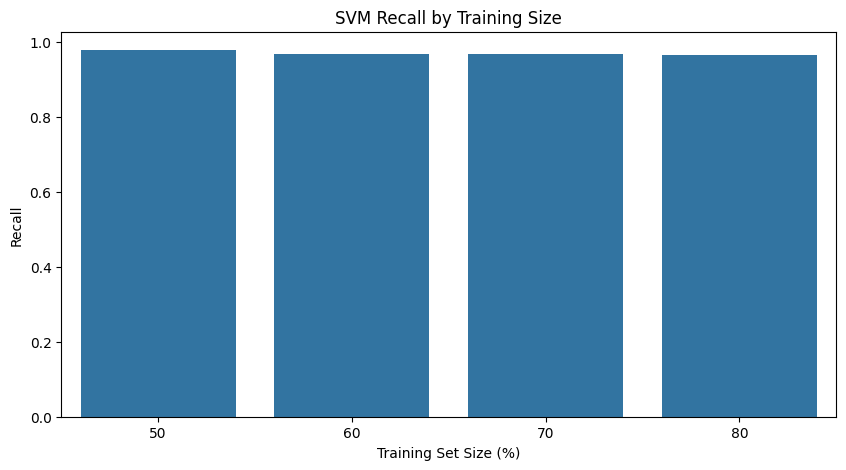

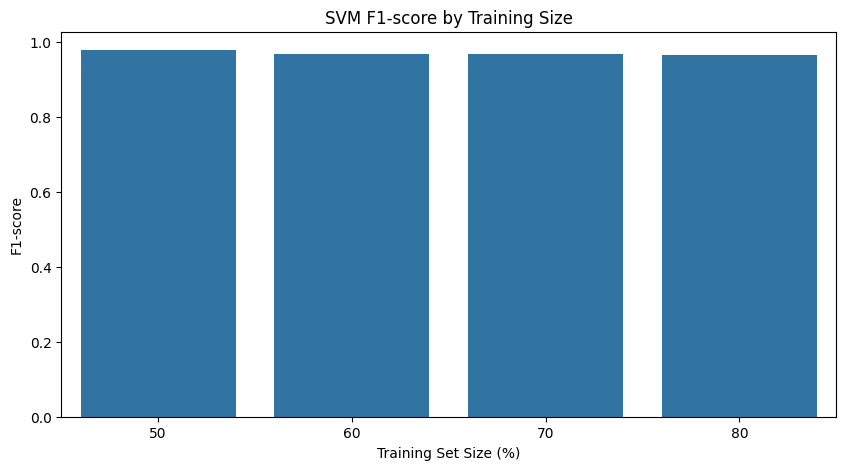

In [ ]:
df = pd.DataFrame(results_mlp)
display(df) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Accuracy')
plt.title('SVM Accuracy by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Precision')
plt.title('SVM Precision by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Recall')
plt.title('SVM Recall by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='F1-score')
plt.title('SVM F1-score by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices

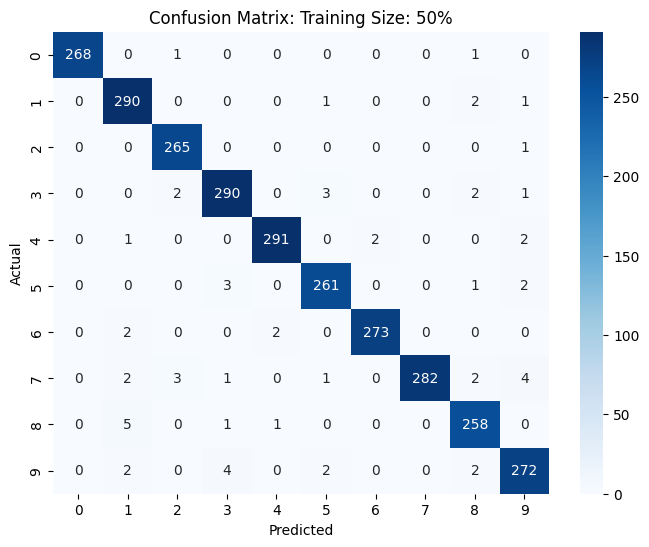

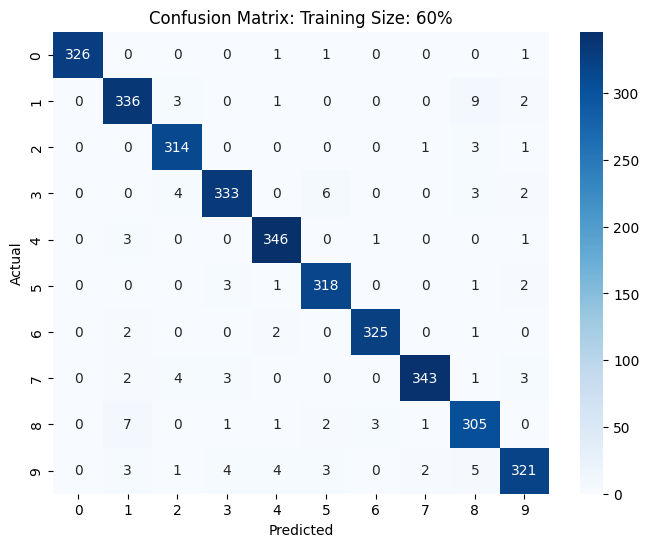

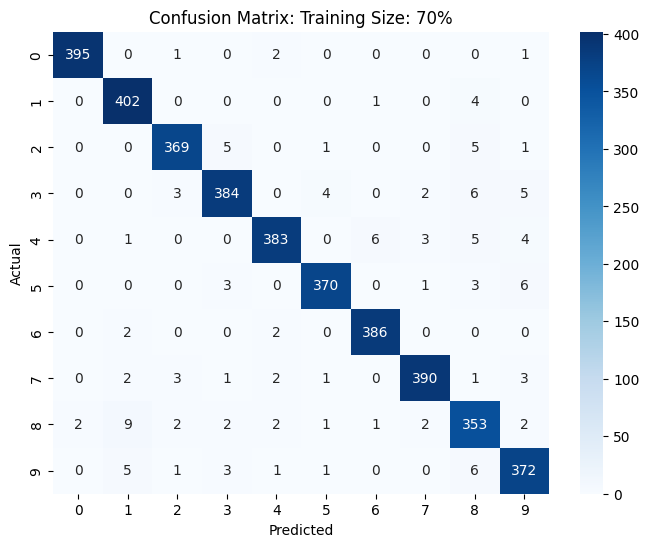

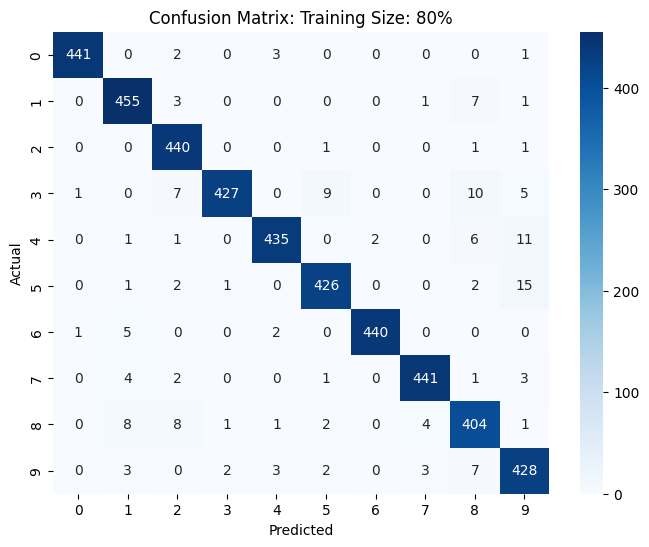

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_mlp:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Training Loss generation curve

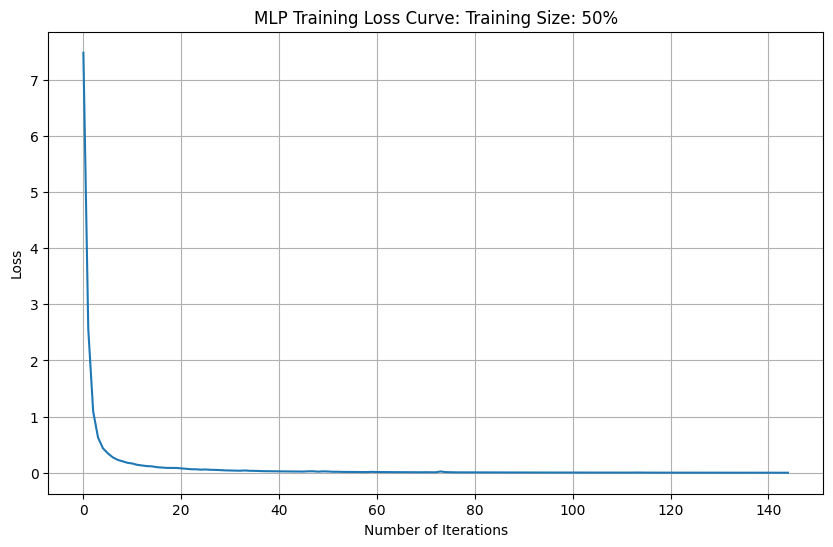

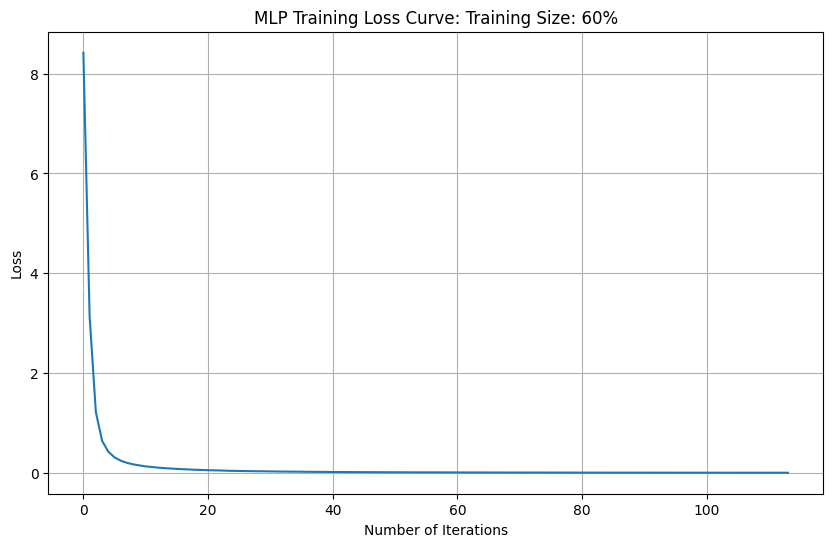

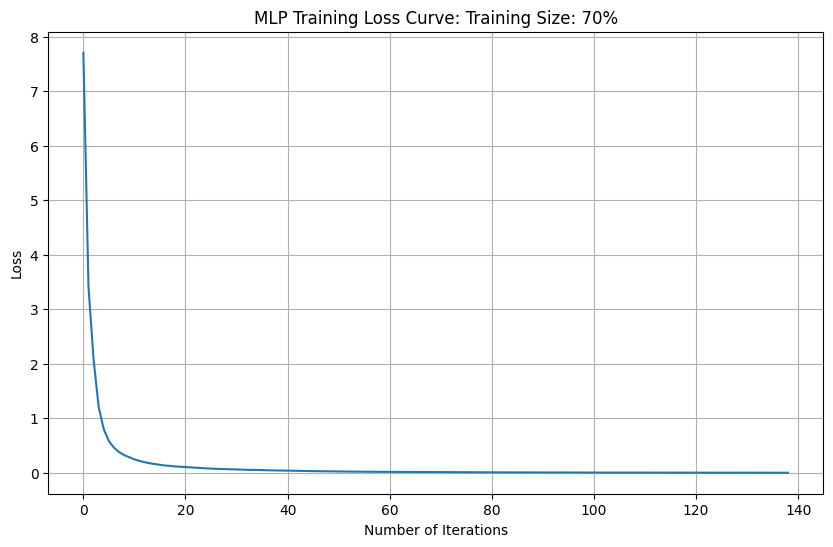

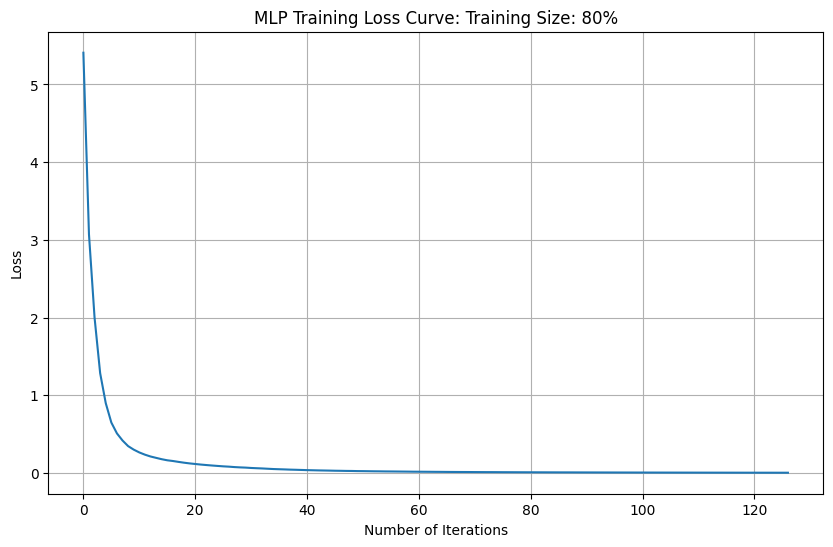

In [ ]:
# Plot training loss curve for each trained MLP model
for model_data in trained_models_mlp:
    model = model_data["Model"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title(f'MLP Training Loss Curve: Training Size: {training_size}%')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


### ROC and AOC curve

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


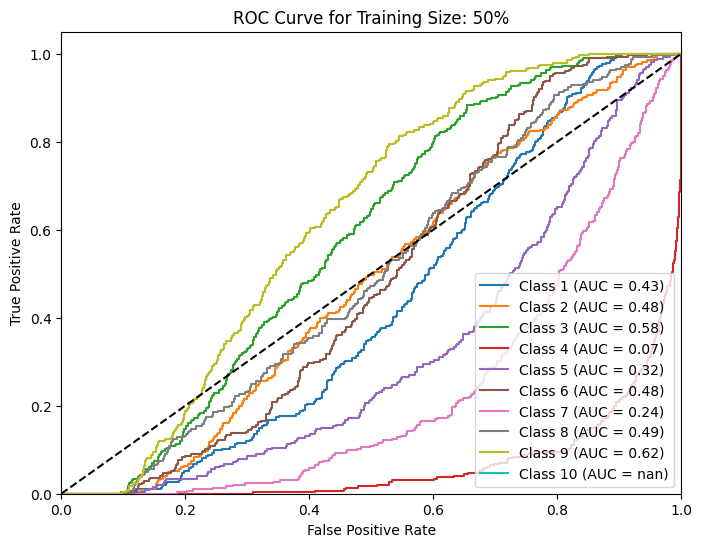

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


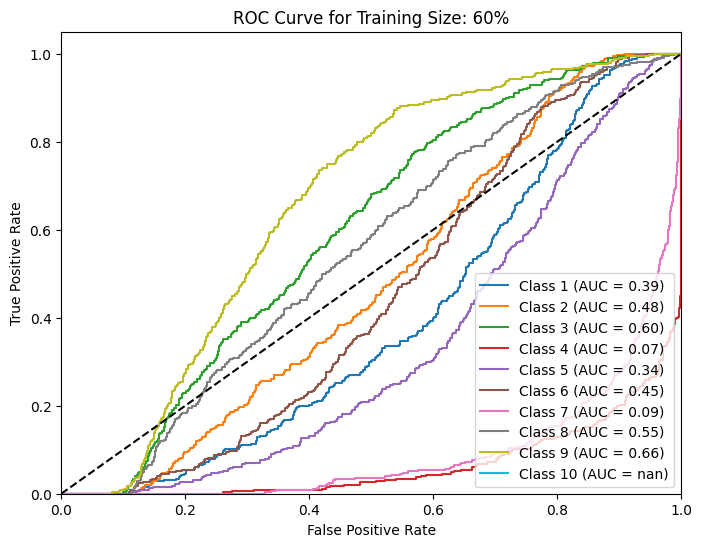

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


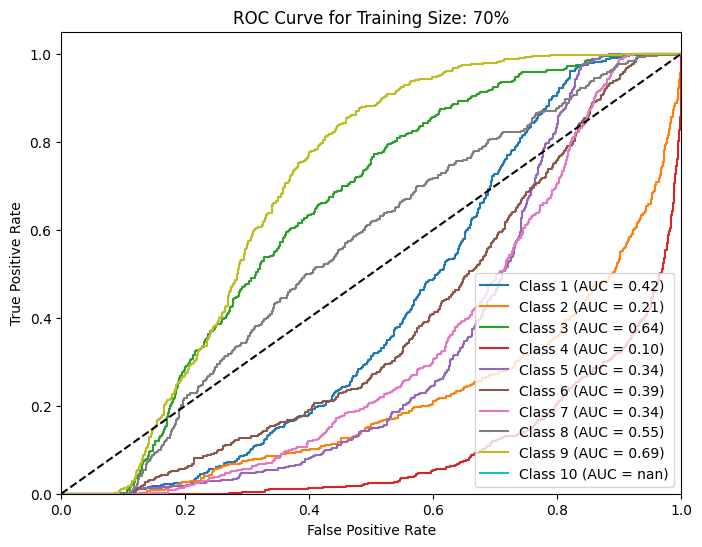

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


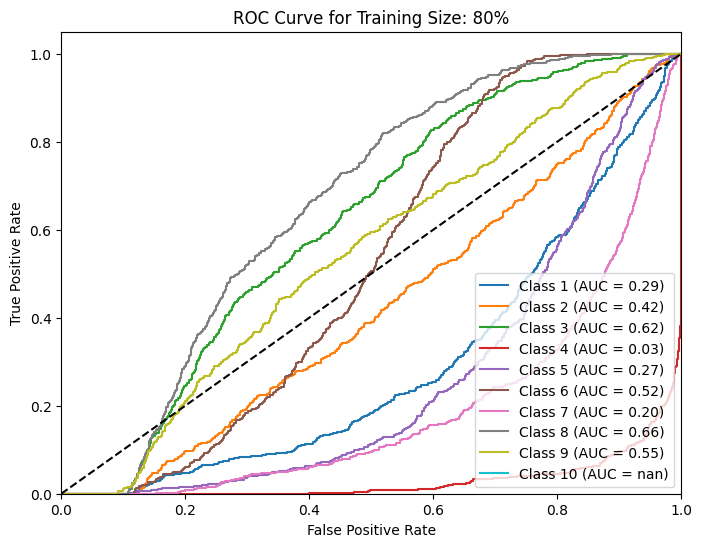

In [ ]:
from sklearn.metrics import roc_curve, auc

# Since this is a multi-class problem, we'll use a One-vs-Rest (OvR) approach for ROC curves
for model_data in trained_models_mlp:
    model = model_data["Model"]
    X_test = model_data["X_test"]
    y_test = model_data["y_test"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(8, 6)) # Create a new figure for each plot

    # Get predicted probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class using OvR
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_test))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--') # Plot random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Training Size: {training_size}%') # Add title for each plot
    plt.legend(loc="lower right")
    plt.show()

### MLP with PCA-Reduced Data

In [ ]:
# Apply the existing PCA transformation to the scaled data
X_pca_reduced_mlp = pca.fit_transform(X_scaled)

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca_reduced_mlp.shape[1]}")
print("\nData after PCA for Random Forest:")
display(pd.DataFrame(X_pca_reduced_mlp).head())


Original number of features: 64
Reduced number of features after PCA: 50

Data after PCA for Random Forest:


0         1         2         3         4         5         6   \
0 -0.296633 -1.446450 -3.863044 -3.223597  0.773631  0.631849  0.163733   
1 -0.156717 -3.065688 -5.811656 -3.232099  1.064670  0.031353  0.270302   
2 -0.753929  3.261949  0.779656 -1.108976  0.311024 -0.814548 -4.307315   
3 -4.226579  1.900320 -0.441486  1.329548 -0.149220  2.710149  2.128209   
4  0.582983 -3.490539 -1.602212 -1.052587 -1.360737  0.406474 -0.662578   

         7         8         9   ...        40        41        42        43  \
0  0.474708 -1.085103 -0.027994  ...  0.517559  0.494320  0.042024 -0.919845   
1  2.091832 -1.487364 -0.998295  ...  0.754699 -0.204192 -0.292517 -0.300754   
2  0.841364 -1.166513 -0.126725  ... -0.572788 -0.060109  0.004906  0.315338   
3  0.206327 -1.659819  0.573584  ...  0.943616 -0.845965 -0.179062  0.466753   
4 -2.572619  0.341349  0.066232  ...  0.094542  0.086006  0.098118  0.760049   

         44        45        46        47        48        49  
0 -0.181330 -0.604761  0.116663 -0.247460  0.112606 -0.090206  
1 -0.441550 -0.082849  0.587194  0.018828  0.014534  0.211886  
2  0.331871  0.927054 -0.313190 -0.748029 -0.148217 -0.039561  
3  0.564706  0.060870  0.027984  0.323670 -0.110900 -1.064628  
4 -0.532223  0.368102  0.162075  0.593148 -0.220887 -0.314977  

[5 rows x 50 columns]

### Calculate MLP performance with PCA-Reduced Data for different test sizes

In [ ]:
results_mlp_pca = []
confusion_matrices_mlp_pca = []
trained_models_mlp_pca = []


for size in training_sizes:
  X_train_pca_mlp, X_test_pca_mlp, y_train, y_test = train_test_split(X_pca_reduced_mlp, y, test_size=size, random_state=42)
  mlp_pca = MLPClassifier(max_iter=1000)

  mlp_pca.fit(X_train_pca_mlp, y_train.values.ravel())
  y_pred_pca_mlp = mlp_pca.predict(X_test_pca_mlp)

  acc_pca_mlp = accuracy_score(y_test, y_pred_pca_mlp)
  precision_pca_mlp = precision_score(y_test, y_pred_pca_mlp, average='weighted', zero_division=0)
  recall_pca_mlp = recall_score(y_test, y_pred_pca_mlp, average='weighted')
  f1_pca_mlp = f1_score(y_test, y_pred_pca_mlp, average='weighted')

  cm_pca_mlp = confusion_matrix(y_test, y_pred_pca_mlp)

  results_mlp_pca.append({
      "Training size":int (size*100),
      "Accuracy":acc_pca_mlp,
      "Precision": precision_pca_mlp,
      "Recall": recall_pca_mlp,
      "F1-score": f1_pca_mlp
  })

  confusion_matrices_mlp_pca.append({
      "Training size":int (size*100),
      "Confusion Matrix":cm_pca_mlp
  })

  trained_models_mlp_pca.append({
      "Training size":int (size*100),
      "Model": mlp_pca,
  })



### Print MLP Performance Table and Graphs with PCA-Reduced Data

Training size  Accuracy  Precision    Recall  F1-score
0             50  0.976868   0.976951  0.976868  0.976883
1             60  0.973310   0.973406  0.973310  0.973321
2             70  0.968480   0.968640  0.968480  0.968490
3             80  0.962856   0.963075  0.962856  0.962863

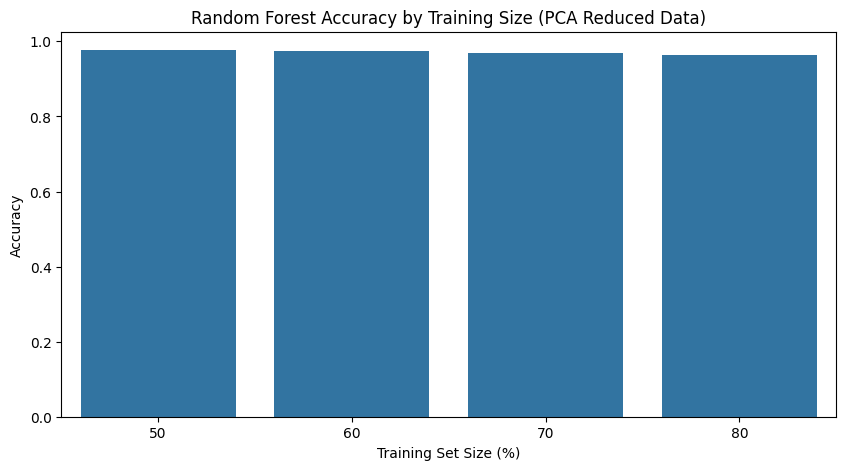

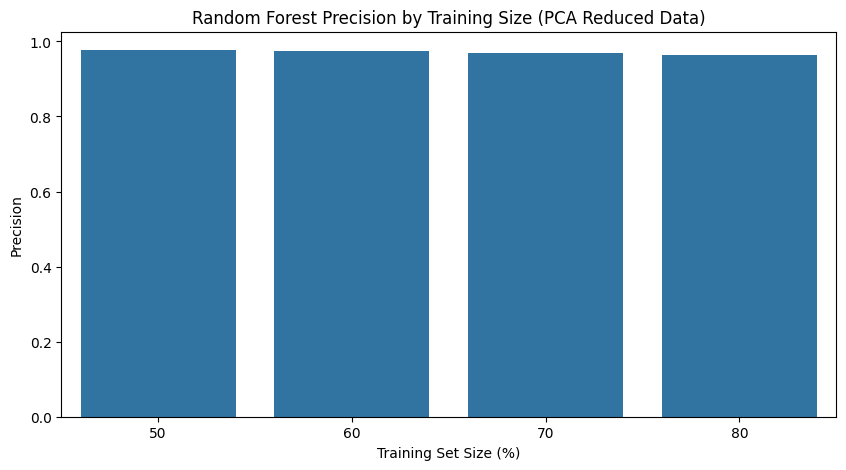

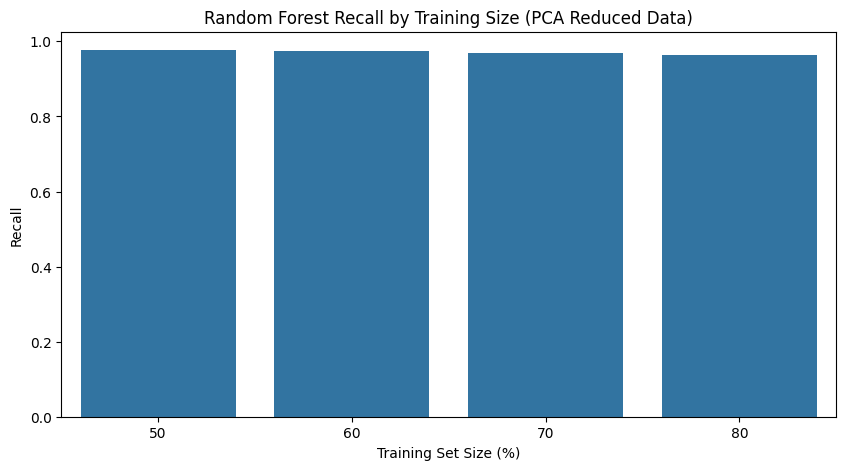

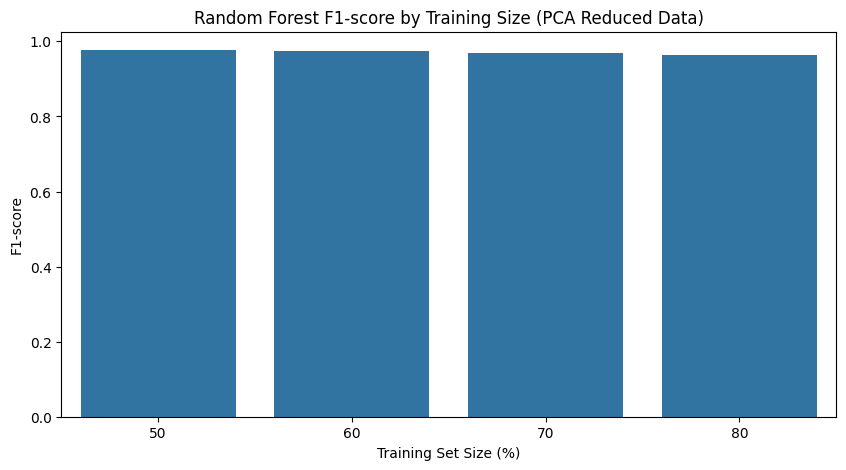

In [ ]:
df_mlp_pca = pd.DataFrame(results_mlp_pca)
display(df_mlp_pca)

# Plot Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='Accuracy')
plt.title('Random Forest Accuracy by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='Precision')
plt.title('Random Forest Precision by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Precision')
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='Recall')
plt.title('Random Forest Recall by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Recall')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5))
sns.barplot(data=df_mlp_pca, x='Training size', y='F1-score')
plt.title('Random Forest F1-score by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1-score')
plt.show()



### Show Confusion Matrices for MLP with PCA-Reduced Data

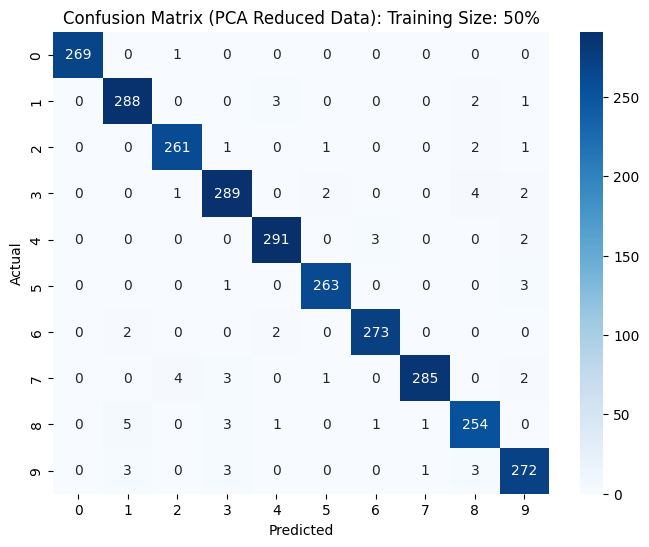

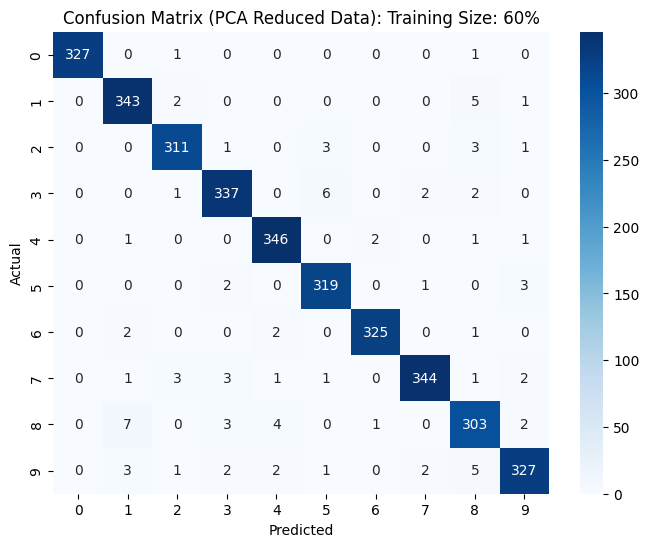

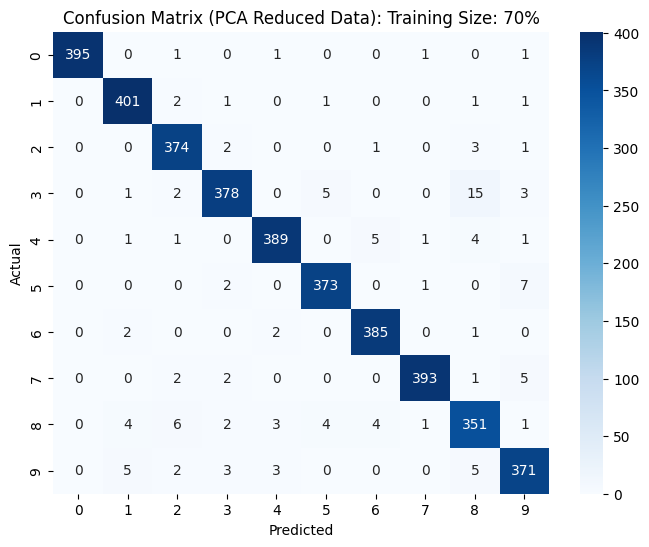

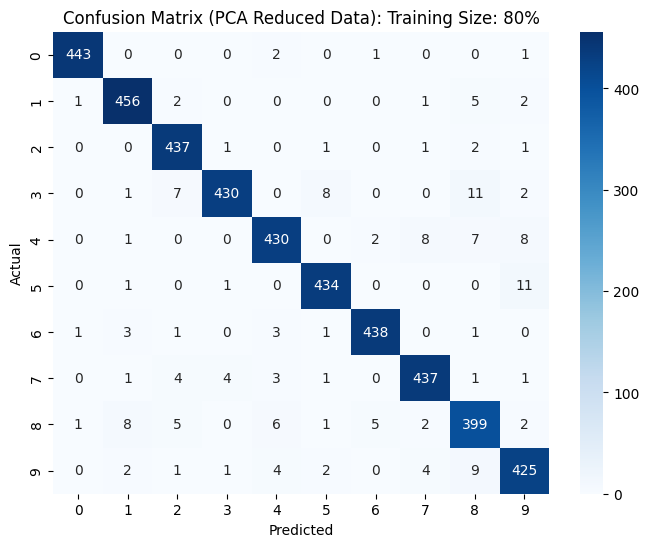

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_mlp_pca:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (PCA Reduced Data): Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Training Loss generation curve with PCA data

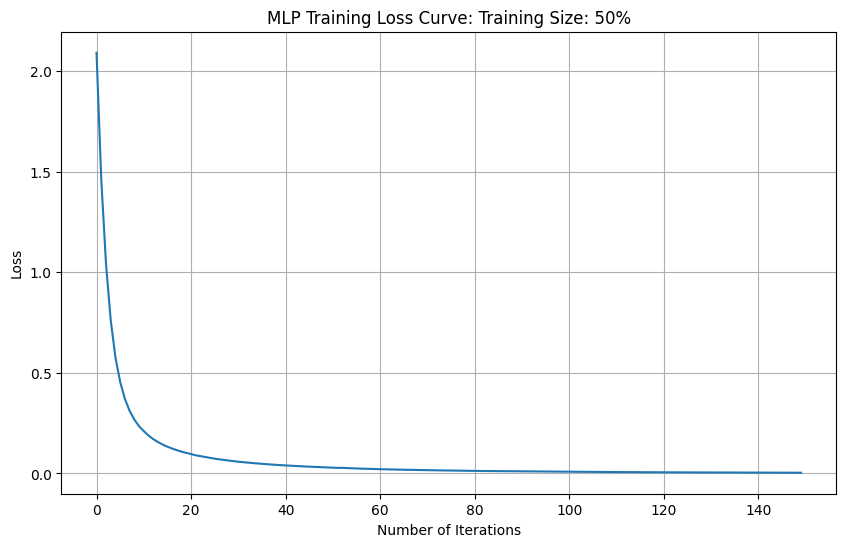

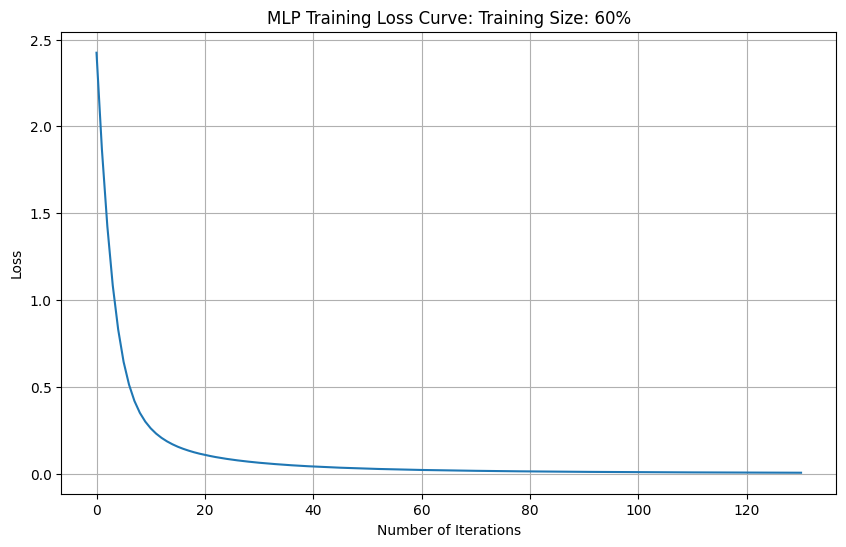

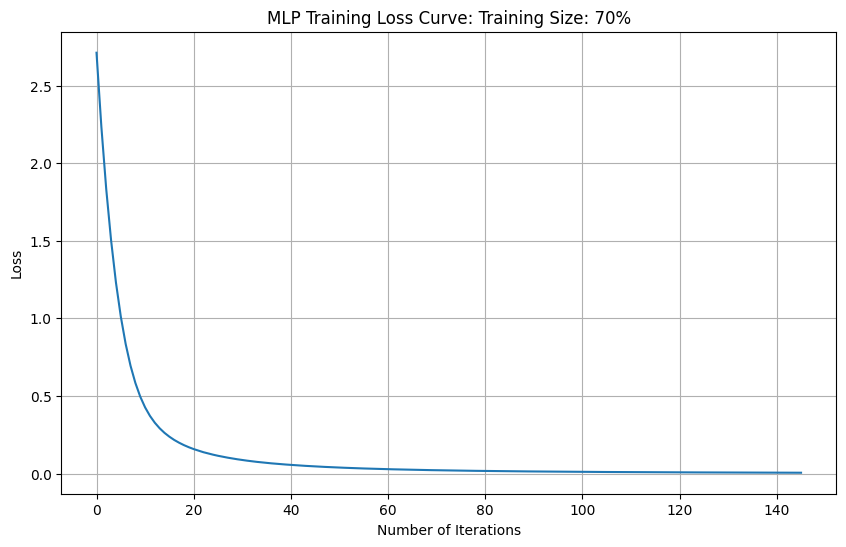

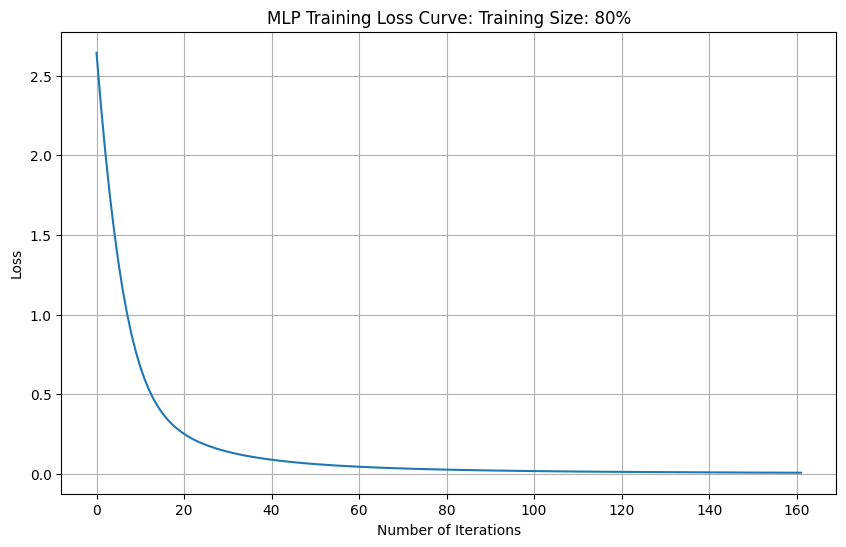

In [ ]:
# Plot training loss curve for each trained MLP model
for model_data in trained_models_mlp_pca:
    model = model_data["Model"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.title(f'MLP Training Loss Curve: Training Size: {training_size}%')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


## ===== Random Forest =====

### Calculate values for different test size

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

training_sizes = [0.5, 0.6, 0.7, 0.8]

results_rf = []
confusion_matrices_rf = []
trained_models_rf = [] # Add a list to store trained models


for size in training_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
  rf = RandomForestClassifier(random_state=42)


  rf.fit(X_train, y_train.values.ravel())
  y_pred_test = rf.predict(X_test)
  y_pred_train = rf.predict(X_train)


  acc_test = accuracy_score(y_test, y_pred_test)
  precision_test = precision_score(y_test, y_pred_test, average='weighted', zero_division=0) # Calculate weighted precision, handle zero division
  recall_test = recall_score(y_test, y_pred_test, average='weighted') # Calculate weighted recall
  f1_test = f1_score(y_test, y_pred_test, average='weighted') # Calculate weighted F1-score

  acc_train = accuracy_score(y_train, y_pred_train)
  precision_train = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
  recall_train = recall_score(y_train, y_pred_train, average='weighted')
  f1_train = f1_score(y_train, y_pred_train, average='weighted')


  cm = confusion_matrix(y_test, y_pred_test) # Calculate confusion matrix

  results_rf.append({
      "Training size":int (size*100),
      "Accuracy":acc_test,
      "Precision": precision_test,
      "Recall": recall_test,
      "F1-score": f1_test
  })

  confusion_matrices_rf.append({ # Store confusion matrix with metadata
      "Training size":int (size*100),
      "Confusion Matrix":cm
  })

  trained_models_rf.append({ # Store the trained model with metadata
      "Training size":int (size*100),
      "Model": rf,
      "X_test": X_test,
      "y_test": y_test
  })

### Print Evalution Table and Graphs

Training size  Accuracy  Precision    Recall  F1-score
0             50  0.974733   0.975024  0.974733  0.974802
1             60  0.972716   0.972770  0.972716  0.972664
2             70  0.968480   0.968704  0.968480  0.968424
3             80  0.956628   0.957079  0.956628  0.956624

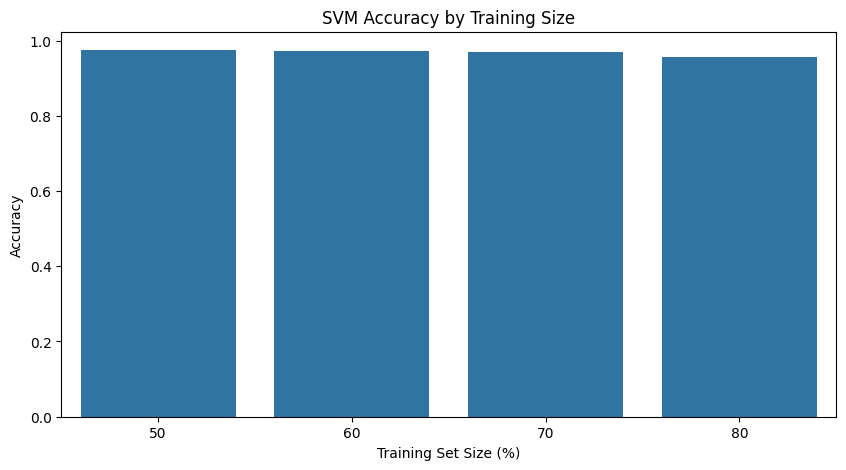

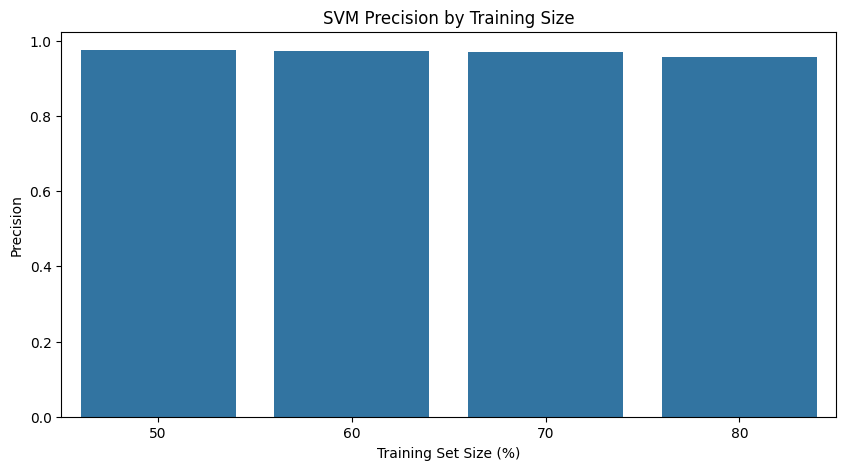

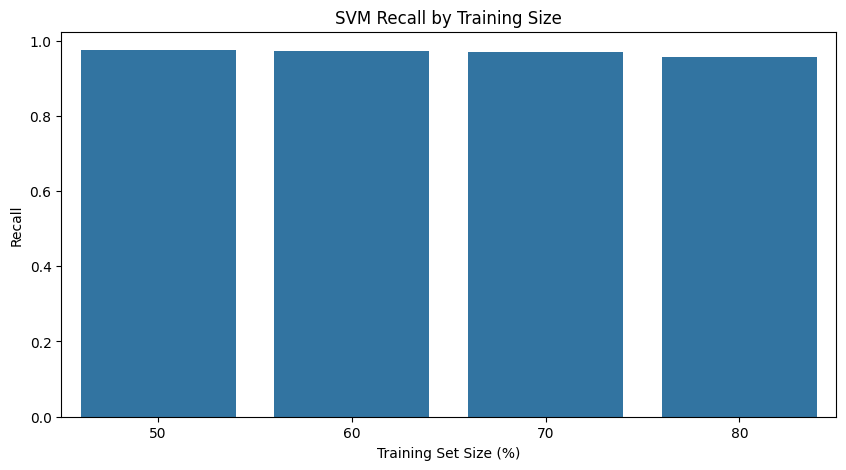

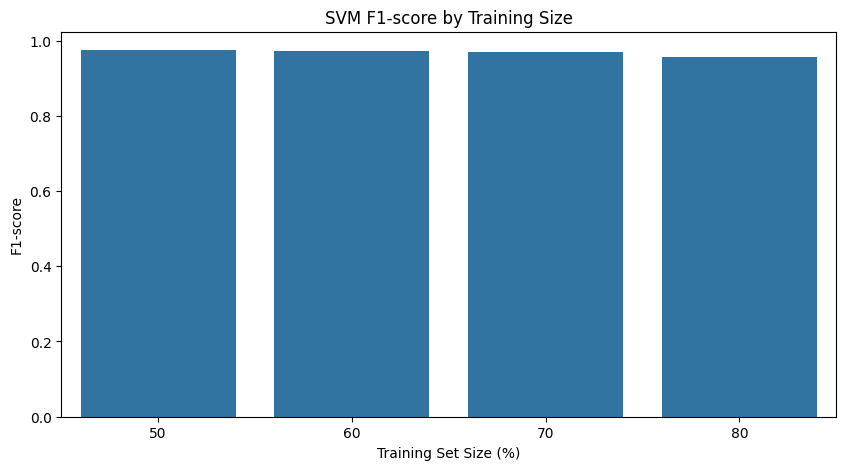

In [ ]:
df = pd.DataFrame(results_rf)
display(df) # Display the DataFrame as a table

# Plot Accuracy
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Accuracy')
plt.title('SVM Accuracy by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Accuracy') # Add y-axis label
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Precision')
plt.title('SVM Precision by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Precision') # Add y-axis label
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='Recall')
plt.title('SVM Recall by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('Recall') # Add y-axis label
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5)) # Increase figure size
sns.barplot(data=df, x='Training size', y='F1-score')
plt.title('SVM F1-score by Training Size') # Add title
plt.xlabel('Training Set Size (%)') # Add x-axis label
plt.ylabel('F1-score') # Add y-axis label
plt.show()

### Show Confusion Matrices

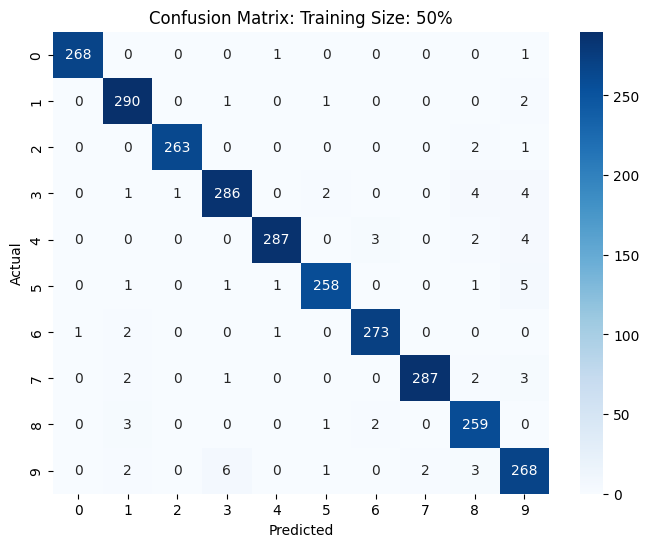

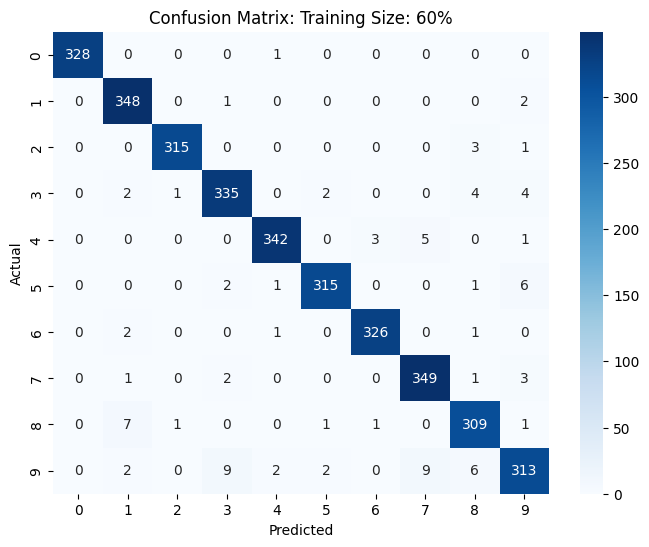

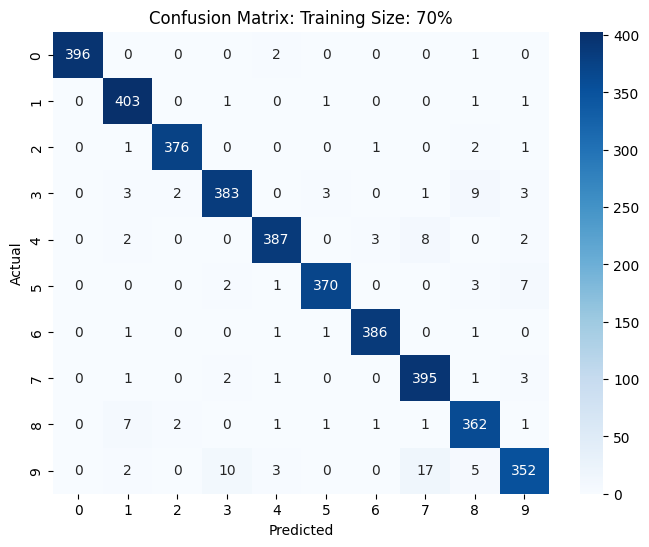

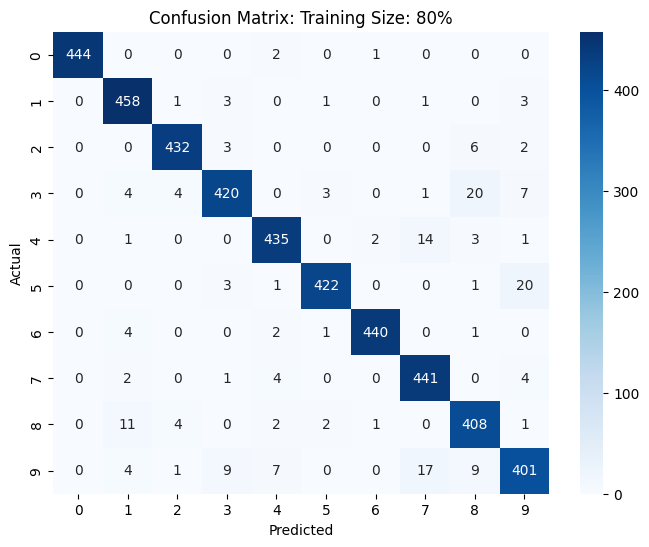

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_rf:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### ROC and AOC curve

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


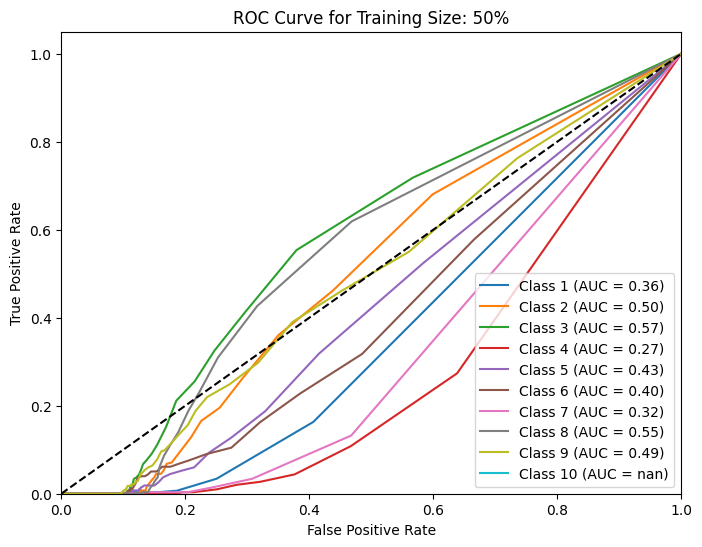

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


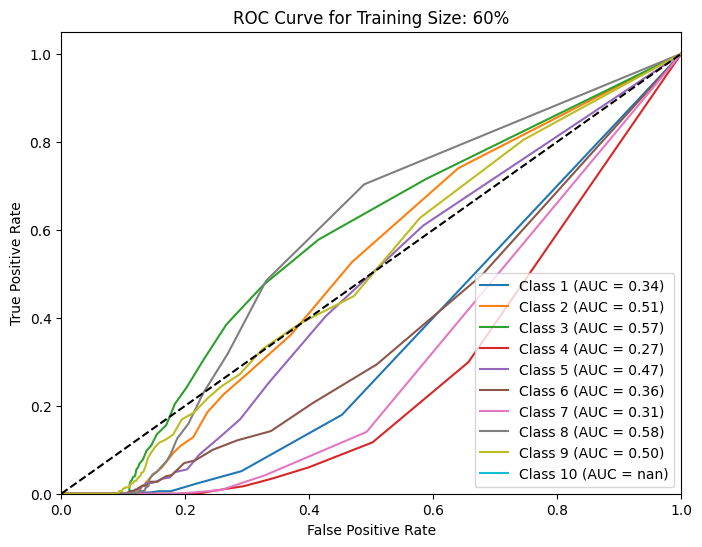

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


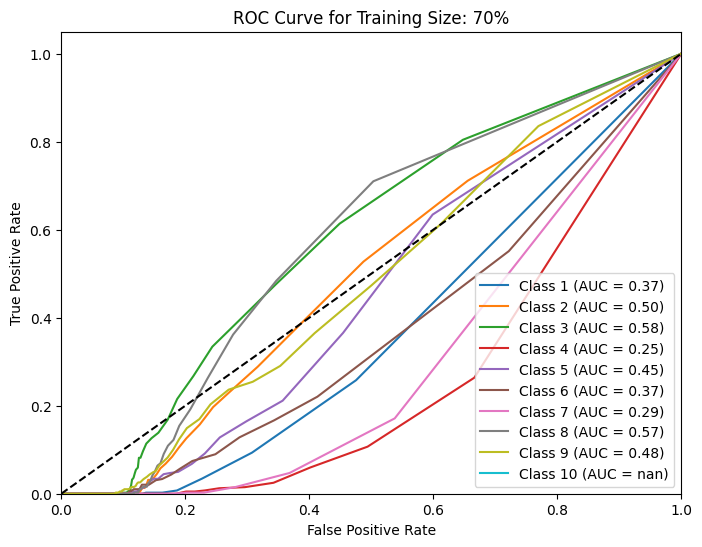

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


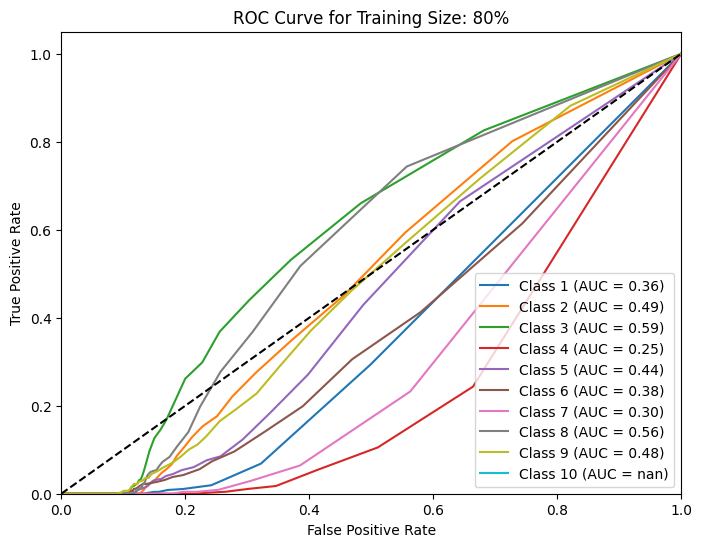

In [ ]:
from sklearn.metrics import roc_curve, auc

# Since this is a multi-class problem, we'll use a One-vs-Rest (OvR) approach for ROC curves
for model_data in trained_models_rf:
    model = model_data["Model"]
    X_test = model_data["X_test"]
    y_test = model_data["y_test"]
    training_size = model_data["Training size"]

    plt.figure(figsize=(8, 6)) # Create a new figure for each plot

    # Get predicted probabilities for each class
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class using OvR
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_test))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--') # Plot random chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Training Size: {training_size}%') # Add title for each plot
    plt.legend(loc="lower right")
    plt.show()

### Random Forest with PCA-Reduced Data

In [ ]:
# Apply the existing PCA transformation to the scaled data
X_pca_reduced_rf = pca.fit_transform(X_scaled)

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca_reduced_rf.shape[1]}")
print("\nData after PCA for Random Forest:")
display(pd.DataFrame(X_pca_reduced_rf).head())


Original number of features: 64
Reduced number of features after PCA: 50

Data after PCA for Random Forest:


0         1         2         3         4         5         6   \
0 -0.296633 -1.446450 -3.863044 -3.223597  0.773631  0.631849  0.163733   
1 -0.156717 -3.065688 -5.811656 -3.232099  1.064670  0.031353  0.270302   
2 -0.753929  3.261949  0.779656 -1.108976  0.311024 -0.814548 -4.307315   
3 -4.226579  1.900320 -0.441486  1.329548 -0.149220  2.710149  2.128209   
4  0.582983 -3.490539 -1.602212 -1.052587 -1.360737  0.406474 -0.662578   

         7         8         9   ...        40        41        42        43  \
0  0.474708 -1.085103 -0.027994  ...  0.517559  0.494320  0.042024 -0.919845   
1  2.091832 -1.487364 -0.998295  ...  0.754699 -0.204192 -0.292517 -0.300754   
2  0.841364 -1.166513 -0.126725  ... -0.572788 -0.060109  0.004906  0.315338   
3  0.206327 -1.659819  0.573584  ...  0.943616 -0.845965 -0.179062  0.466753   
4 -2.572619  0.341349  0.066232  ...  0.094542  0.086006  0.098118  0.760049   

         44        45        46        47        48        49  
0 -0.181330 -0.604761  0.116663 -0.247460  0.112606 -0.090206  
1 -0.441550 -0.082849  0.587194  0.018828  0.014534  0.211886  
2  0.331871  0.927054 -0.313190 -0.748029 -0.148217 -0.039561  
3  0.564706  0.060870  0.027984  0.323670 -0.110900 -1.064628  
4 -0.532223  0.368102  0.162075  0.593148 -0.220887 -0.314977  

[5 rows x 50 columns]

### Calculate Random Forest performance with PCA-Reduced Data for different test sizes

In [ ]:
results_rf_pca = []
confusion_matrices_rf_pca = []


for size in training_sizes:
  X_train_pca_rf, X_test_pca_rf, y_train, y_test = train_test_split(X_pca_reduced_rf, y, test_size=size, random_state=42)
  rf_pca = RandomForestClassifier(random_state=42)

  rf_pca.fit(X_train_pca_rf, y_train.values.ravel())
  y_pred_pca_rf = rf_pca.predict(X_test_pca_rf)

  acc_pca_rf = accuracy_score(y_test, y_pred_pca_rf)
  precision_pca_rf = precision_score(y_test, y_pred_pca_rf, average='weighted', zero_division=0)
  recall_pca_rf = recall_score(y_test, y_pred_pca_rf, average='weighted')
  f1_pca_rf = f1_score(y_test, y_pred_pca_rf, average='weighted')

  cm_pca_rf = confusion_matrix(y_test, y_pred_pca_rf)

  results_rf_pca.append({
      "Training size":int (size*100),
      "Accuracy":acc_pca_rf,
      "Precision": precision_pca_rf,
      "Recall": recall_pca_rf,
      "F1-score": f1_pca_rf
  })

  confusion_matrices_rf_pca.append({
      "Training size":int (size*100),
      "Confusion Matrix":cm_pca_rf
  })



### Print Random Forest Performance Table and Graphs with PCA-Reduced Data

Training size  Accuracy  Precision    Recall  F1-score
0             50  0.956584   0.956721  0.956584  0.956593
1             60  0.953440   0.953564  0.953440  0.953439
2             70  0.949670   0.949986  0.949670  0.949693
3             80  0.940169   0.940719  0.940169  0.940303

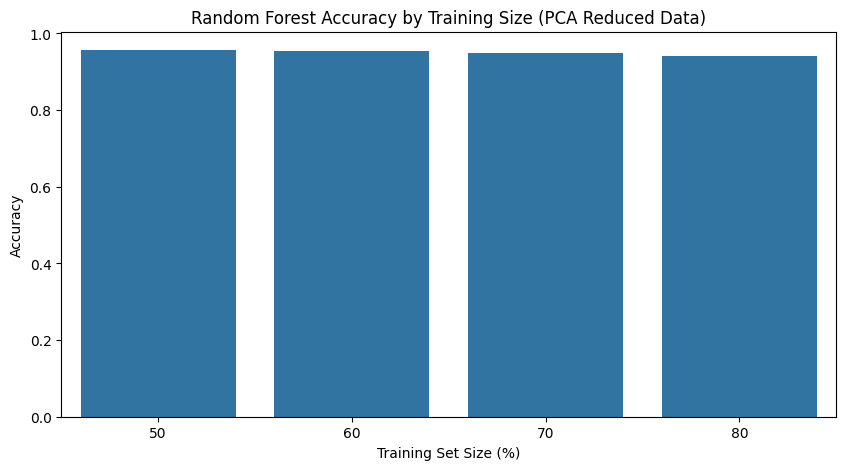

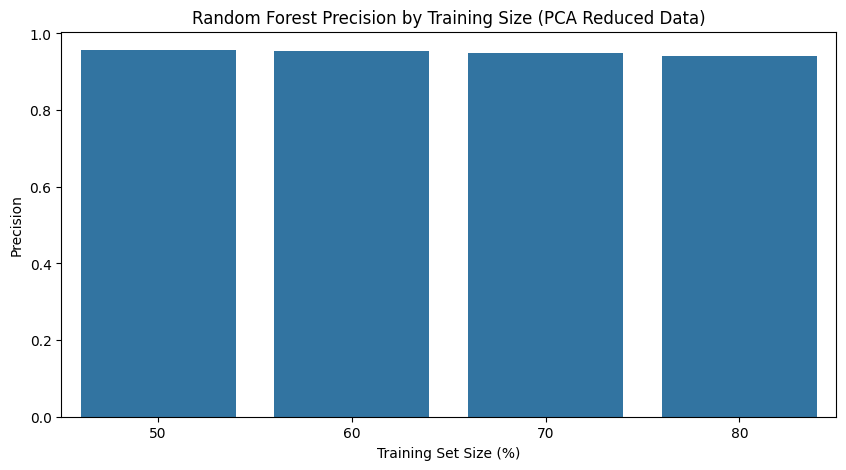

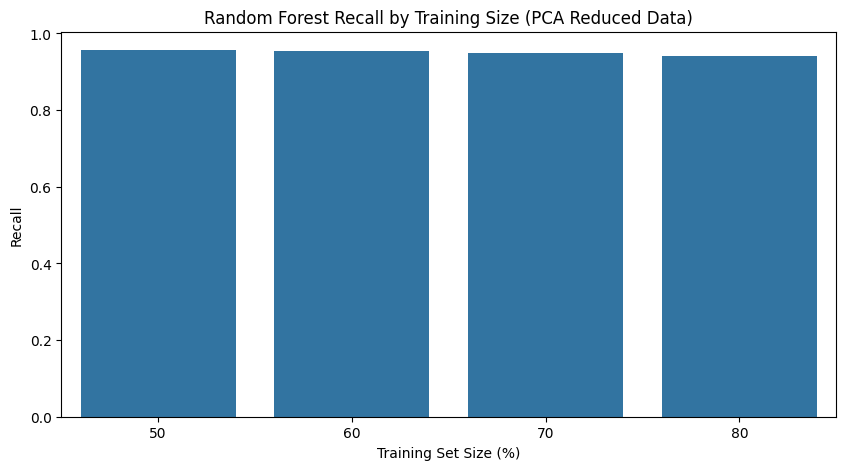

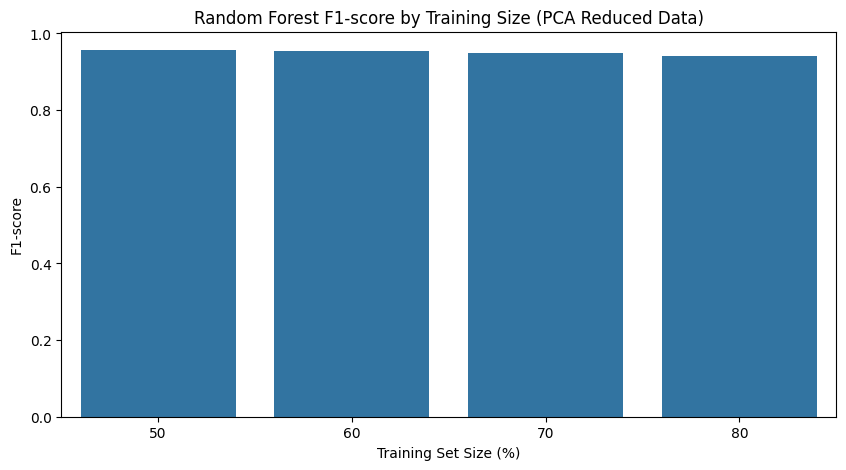

In [ ]:
df_rf_pca = pd.DataFrame(results_rf_pca)
display(df_rf_pca)

# Plot Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='Accuracy')
plt.title('Random Forest Accuracy by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='Precision')
plt.title('Random Forest Precision by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Precision')
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='Recall')
plt.title('Random Forest Recall by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Recall')
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5))
sns.barplot(data=df_rf_pca, x='Training size', y='F1-score')
plt.title('Random Forest F1-score by Training Size (PCA Reduced Data)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1-score')
plt.show()



### Show Confusion Matrices for Random Forest with PCA-Reduced Data

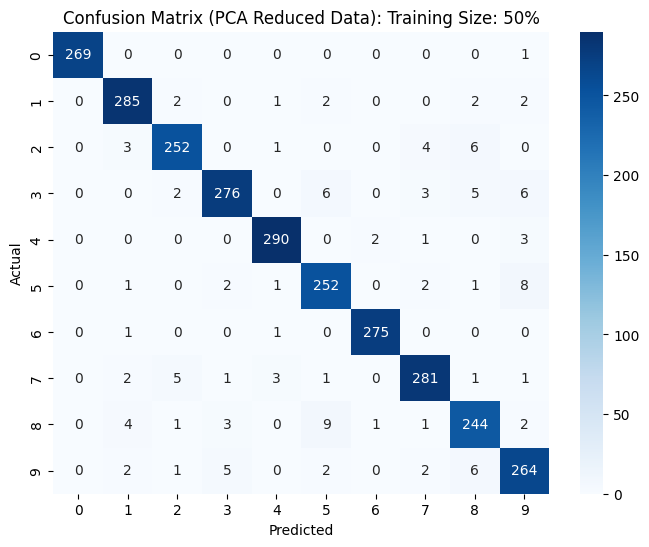

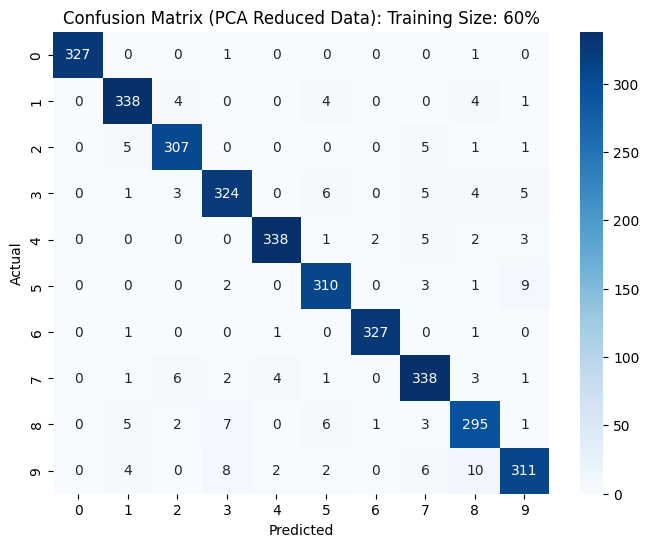

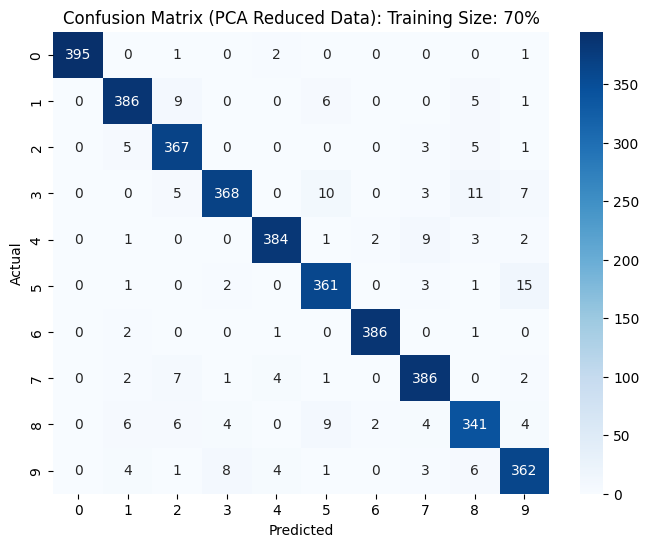

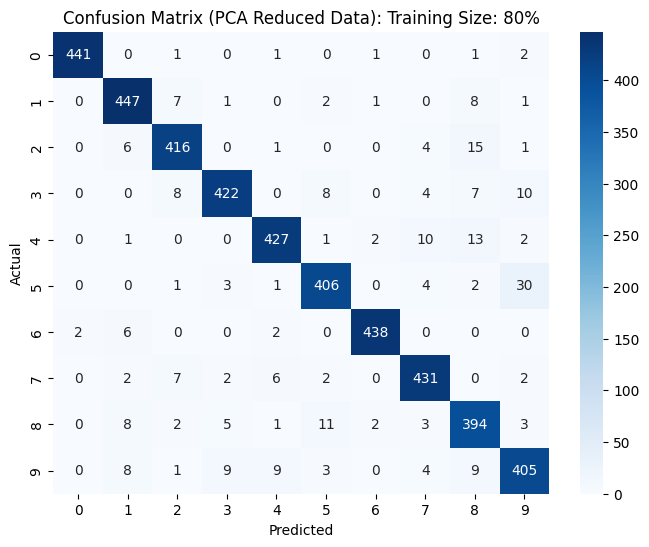

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cm_data in confusion_matrices_rf_pca:
    cm = cm_data["Confusion Matrix"]
    training_size = cm_data["Training size"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (PCA Reduced Data): Training Size: {training_size}%')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# **Machine Learning Model Performance Report**

## Handwritten Digit Dataset Evaluation

### 1. Support Vector Machine (SVM)

This section evaluates the performance of SVM models on the Handwritten Digit dataset, focusing on how different kernels, training sizes, and dimensionality reduction through PCA affect the outcomes.

#### Influence of Training Size and Kernel Choice:

SVM models were tested with multiple kernel functions (linear, polynomial, gaussian, and sigmoid) across varying training proportions (50%, 60%, 70%, and 80%) on the Digit dataset.

*[Insert Bar plots for Accuracy, Precision, Recall, and F1-score vs. Training Size for each kernel on the Digit Dataset here]*

#### Results Overview:

*[Insert table of SVM results on Original Digit Dataset here]*

For this dataset, the polynomial and gaussian kernels consistently achieved superior performance compared to the linear and sigmoid kernels. Their metrics remained strong and stable across different training sizes.

#### Effect of PCA Dimensionality Reduction:

PCA was applied to the Digit dataset to reduce its high-dimensional feature space before training SVM models.

*[Insert table of SVM results on PCA-Reduced Digit Dataset here]*

The application of PCA led to noticeable improvements, particularly with the gaussian kernel. Accuracy and related measures increased, indicating that PCA effectively simplified the feature space while preserving key information.

#### Confusion Matrices:

*[Insert Confusion Matrices for SVM on Original Data here]*

*[Insert Confusion Matrices for SVM on PCA-Reduced Data here]*

The confusion matrices highlight that PCA helped SVM models, especially those using the gaussian kernel, to make more accurate predictions across different digits.

#### ROC and AUC Curves:

*[Insert ROC and AUC curves for SVM on Original Data here]*

The ROC and AUC analyses reinforce the stronger performance of polynomial and gaussian kernels, as well as the performance boost after PCA reduction.

---

### 2. Multilayer Perceptron (MLP)

This section examines the performance of MLP models on the Handwritten Digit dataset, including training size effects, training loss progression, and PCA's influence.

#### Impact of Training Size:

The MLP model was trained on different portions of the dataset (50%, 60%, 70%, and 80%) to assess the effect of data availability.

*[Insert Bar plots for Accuracy, Precision, Recall, and F1-score vs. Training Size for MLP on Digit Dataset here]*

#### Results Overview:

*[Insert table of MLP results on Original Digit Dataset here]*

Across all training sizes, the MLP delivered high accuracy and strong metrics, showing consistent and reliable performance.

#### Training Loss Behavior:

*[Insert MLP Training Loss Curves for Digit Dataset here]*

The training loss curves for the MLP reveal a steady decline, reflecting effective learning and convergence during training.

#### Effect of PCA Dimensionality Reduction:

MLP was also trained on PCA-transformed features for comparison.

*[Insert table of MLP results on PCA-Reduced Digit Dataset here]*

PCA enhanced the performance of the MLP, similar to what was observed in other datasets. By lowering dimensionality, the model managed the data complexity more effectively, leading to improved accuracy.

#### Confusion Matrices:

*[Insert Confusion Matrices for MLP on Original Data here]*

*[Insert Confusion Matrices for MLP on PCA-Reduced Data here]*

The confusion matrices confirm that PCA reduced misclassification errors, making predictions more precise.

#### ROC and AUC Curves:

*[Insert ROC and AUC curves for MLP on Original Data here]*

On PCA-transformed data, ROC and AUC results show a stronger ability to discriminate between different classes.

---

### 3. Random Forest

This section explores the Random Forest model's performance on the Handwritten Digit dataset, both with original features and after applying PCA.

#### Impact of Training Size:

Random Forest models were trained using subsets of 50%, 60%, 70%, and 80% of the dataset to compare performance stability.

*[Insert Bar plots for Accuracy, Precision, Recall, and F1-score vs. Training Size for Random Forest on Digit Dataset here]*

#### Results Overview:

*[Insert table of Random Forest results on Original Digit Dataset here]*

The Random Forest model consistently produced high-quality predictions on the original data, with little variation across training sizes.

#### Effect of PCA Dimensionality Reduction:

Random Forest was also trained on PCA-reduced data.

*[Insert table of Random Forest results on PCA-Reduced Digit Dataset here]*

Unlike SVM and MLP, Random Forest experienced a slight drop in performance when using PCA features. This suggests that the original feature set contained richer discriminatory signals for tree-based methods.

#### Confusion Matrices:

*[Insert Confusion Matrices for Random Forest on Original Data here]*

*[Insert Confusion Matrices for Random Forest on PCA-Reduced Data here]*

The confusion matrices show fewer classification errors when the model used the original dataset compared to PCA-transformed features.

#### ROC and AUC Curves:

*[Insert ROC and AUC curves for Random Forest on Original Data here]*

The ROC and AUC plots indicate better performance for the original dataset, with PCA leading to a slight reduction in discriminatory power.
